In [1]:
import pandas as pd
import numpy as np
import cx_Oracle
import os
import json
import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action="ignore")
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import bs4
import requests
import time
import math
import random
from shapely.geometry import Point, Polygon
import time as timesys
from pyproj import Geod
from haversine import haversine
pd.set_option('display.max_columns', None)

In [2]:
interpolation_number = "10000"

In [3]:
the_number_of_segment = 100

In [4]:
vessel_name = 'OOCL_NEW_YORK'

# 전항지 출항 확인

전항지 출항 지점 확인

In [5]:
import os
 
path_dir = 'voy_path'
 
file_list = os.listdir(path_dir)
file_new_list = []
for i in file_list:
    if "portmis" in i:
        file_new_list.append(i)

In [6]:
# ATA 확인
def check_ATA(df_test):
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
            break
            continue
    return stop_index

# 시각화 툴로 processed된 것들 확인

항로 클러스터링

In [7]:
# dense_upper_china_list = ['COSCO_FOS_VRKR6_23processed'
# ,'AKA_BHUM_9V7282_7processed'
# , 'COSCO_FOS_VRKR6_25processed'
# , 'MSC_LA_SPEZIA_DIGX2_2processed'
# , 'OOCL_NEW_YORK_VRJS2_2processed'
# , 'MSC_WASHINGTON_5LDP4_4processed'
# , 'MSC_SOFIA_PAZ_D5FL9_2processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_26processed'
# , 'OOCL_HAMBURG_VRZK9_6processed'
# , 'SEAMAX_STRATFORD_V7EP2_6processed'
# , 'OOCL_LUXEMBOURG_VRGO3_5processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_25processed'
# , 'MSC_LUCIANA_3FTY3_4processed'
# , 'MSC_RENEE_VRPL2_5processed'
# , 'COSCO_FOS_VRKR6_24processed'
# , 'COSCO_FOS_VRKR6_20processed'
# , 'COSCO_FOS_VRKR6_26processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_23processed'
# , 'OOCL_HAMBURG_VRZK9_5processed']

# OOCL_NEW_YORK_voyages_list = [
#     'COSCO_FOS_VRKR6_2022_20processed', 'COSCO_FOS_VRKR6_2022_23processed',
#     'COSCO_FOS_VRKR6_2022_24processed', 'COSCO_FOS_VRKR6_2022_25processed',
#     'OOCL_NEW_YORK_VRJS2_2022_2processed', 'COSCO_FOS_VRKR6_2022_27processed',
#     'COSCO_FOS_VRKR6_2022_28processed', 'OOCL_NEW_YORK_VRJS2_2022_2processed',
#     'COSCO_FOS_VRKR6_2022_30processed'
# ]

# OOCL_NEW_YORK_voyages_list = [
#     'OOCL_NEW_YORK_VRJS2_2022_2processed', 'AKA_BHUM_9V7282_2022_8processed'
# ]
OOCL_NEW_YORK_voyages_list = [
    'OOCL_NEW_YORK_VRJS2_2022_1processed',
    'OOCL_NEW_YORK_VRJS2_2022_2processed',
    'OOCL_NEW_YORK_VRJS2_2022_3processed'
]

OOCL_LUXEMBOURG_voyages_list = [
    'OOCL_LUXEMBOURG_VRGO3_2022_5processed',
    'OOCL_LUXEMBOURG_VRGO3_2022_6processed'
]

OOCL_GENOA_voyages_list = [
    'OOCL_GENOA_VROK9_2022_3processed', 'OOCL_GENOA_VROK9_2022_5processed'
]

OOCL_HAMBURG_voyages_list = [
    'OOCL_HAMBURG_VRZK9_2022_5processed', 'OOCL_HAMBURG_VRZK9_2022_6processed'
]

SEAMAX_STRATFORD_voyages_list = [
    'SEAMAX_STRATFORD_V7EP2_2022_6processed',
    'SEAMAX_STRATFORD_V7EP2_2022_7processed'
]

ZIM_CHARLESTORN_voyages_list = [
    'ZIM_CHARLESTON_VRUC3_2022_6processed',
    'ZIM_CHARLESTON_VRUC3_2022_7processed'
]

single_voyage_list = [
    'MSC_ARIANE_3FDA3_2022_1processed', 'MSC_DANIT_3FZU8_2022_2processed',
    'MSC_EVA_3EVM7_2022_1processed', 'MSC_EXPRESS_III_A8LG7_2022_1processed',
    'MSC_KANOKO_D5TM3_2023_1processed', 'MSC_LA_SPEZIA_DIGX2_2022_2processed',
    'MSC_VANESSA_HOWD_2023_1processed', 'MSC_VIRGO_CQEB9_2023_2processed',
    'MSC_SOFIA_PAZ_D5FL9_2022_2processed',
    'MSC_WASHINGTON_5LDP4_2022_4processed',
    'MSC_RAVENNA_A8ZU8_2022_3processed', 'MSC_VANDYA_3FDW4_2022_2processed',
    'MSC_RENEE_VRPL2_2022_5processed', 'SEASPAN_OCEANIA_VRBI2_2023_1processed',
    'SEASPAN_BREEZE_VRNL8_2023_1processed', 'VALENCE_9HA3398_2023_1processed'
]

In [8]:
upper_china_path_dir = 'voy_path/upper_china/processed/'

# Tianjin to Busan PNIT

## AKA_BHUM

In [9]:
coordinates_array = pd.DataFrame(data={"latitude" : [],"longitude" : []})

for i in OOCL_NEW_YORK_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    coordinates_array = coordinates_array.append(df[["latitude","longitude"]], ignore_index=True)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from shapely.geometry import LineString

In [12]:
from scipy import interpolate
import pandas as pd

## below 3 knot 제거

### interpolation 1000

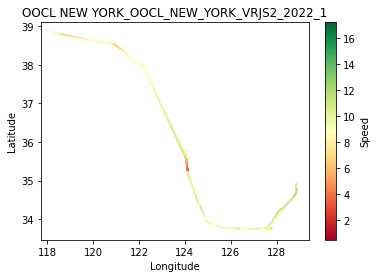

보간법 전 일반 평균 속도 : 9.433653846153845
보간법 전 일반 속도 표준편차: 1.577918659655788
보간법 전 저속 제거 평균 속도 : 9.433653846153845
보간법 전 저속 제거 속도 표준편차: 1.577918659655788
-
보간법 후 일반 평균 속도 : 9.055640593787365
보간법 후 일반 속도 표준편차: 1.5060267546189285
보간법 후 저속 제거 평균 속도 : 9.055640593787365
보간법 후 저속 제거 속도 표준편차: 1.5060267546189285


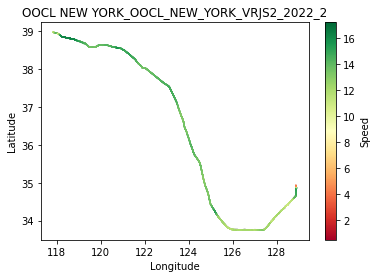

보간법 전 일반 평균 속도 : 13.148247978436657
보간법 전 일반 속도 표준편차: 1.421016686831533
보간법 전 저속 제거 평균 속도 : 13.148247978436657
보간법 전 저속 제거 속도 표준편차: 1.421016686831533
-
보간법 후 일반 평균 속도 : 13.338561397420184
보간법 후 일반 속도 표준편차: 1.297581838906322
보간법 후 저속 제거 평균 속도 : 13.338561397420184
보간법 후 저속 제거 속도 표준편차: 1.297581838906322


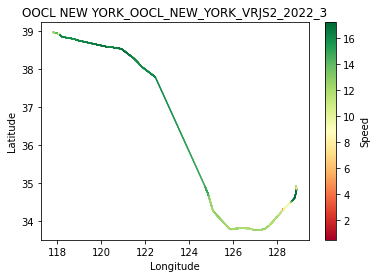

보간법 전 일반 평균 속도 : 12.789285714285715
보간법 전 일반 속도 표준편차: 2.479073208239914
보간법 전 저속 제거 평균 속도 : 12.789285714285715
보간법 전 저속 제거 속도 표준편차: 2.479073208239914
-
보간법 후 일반 평균 속도 : 13.859898151289153
보간법 후 일반 속도 표준편차: 2.9169058866671738
보간법 후 저속 제거 평균 속도 : 13.859898151289153
보간법 후 저속 제거 속도 표준편차: 2.9169058866671738


In [13]:
max_speed_list = []
min_speed_list = []
for i in OOCL_NEW_YORK_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in OOCL_NEW_YORK_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=int(interpolation_number))

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

#     Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

#         Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [14]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['OOCL_NEW_YORK_VRJS2_2022_1',
 'OOCL_NEW_YORK_VRJS2_2022_2',
 'OOCL_NEW_YORK_VRJS2_2022_3']

In [15]:
high_speed_path_data =[]
low_speed_path_data =[]
for i in OOCL_NEW_YORK_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [16]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [17]:
# all_data = pd.concat(high_speed_path_data)

# # Add a new index column representing the row number
# all_data['index'] = range(len(all_data))
# all_data["index"] = all_data.index
# concaternated_df = all_data.groupby('index').mean()
# concaternated_df.to_csv(f"실험/upper_china_cosco_fos_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [18]:
result_df_dict=  {
    "experiment_no" : [],
    "mean_speed" : [],
    "max_speed" : []
}

In [19]:
# 가는 길인데 굳이 오래 돌아갈 필요는 없잖아 알고리즘
def optimal_next_point(current_position, shortest_point_idx, shortest_distance,
                       path_df):
    posi_c = current_position
    latitude_i = path_df.loc[shortest_point_idx, "latitude"]
    longitude_i = path_df.loc[shortest_point_idx, "longitude"]
    posi_i = (latitude_i, longitude_i)
    min_d = shortest_distance
    n = shortest_point_idx + 1
    while True:
        try:
            latitude_n = path_df.loc[n, "latitude"]
            longitude_n = path_df.loc[n, "longitude"]
            posi_n = (latitude_n, longitude_n)
            distance = haversine(posi_c, posi_n, unit="km")
            if n == shortest_point_idx + 1:
                path_distance = haversine(posi_i, posi_n, unit="km")
                paths_distance = path_distance
            else:
                path_distance = haversine(posi_n, posi_previous_n, unit="km")
                paths_distance += path_distance

            if distance < (paths_distance + min_d):
                optimal_next_point_idx = n
                return optimal_next_point_idx
            elif n == path_df.index[-1]:
                print("no better optimal_point")
                return shortest_point_idx + 1
            else:
                n = n + 1
                posi_previous_n = posi_n
        except:
            print("no better optimal_point")
            return shortest_point_idx + 1

In [20]:
# 인덱스 번호를 가지고 항로의 segment 번호를 찾음
# 만약 segment의 마지막 번호라면 seg_no를 하나 더한다.

def find_segment_no(optimal_point_idx, path_df, the_number_of_segment):
    seg_no = optimal_point_idx // (len(path_df) / the_number_of_segment)
    next_no = (optimal_point_idx + 1) // (len(path_df) / the_number_of_segment)
    if seg_no != next_no:
        return int(next_no)
    else:
        return int(seg_no)

In [21]:
# df 내의 포인트 전체 길이 구하는 함수
def reckon_point_lengths(df_test_2):
    distance = 0
    df_test_2.reset_index(inplace=True, drop=True)
    for idx in df_test_2.index:
        if idx != 0:
            LONGITUDE = df_test_2.loc[idx, "longitude"]
            LATITUDE = df_test_2.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
            LATITUDE = df_test_2.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            distance += haversine(current_coord, previous_current_coord, unit="km")
    return distance

In [22]:
def cal_duration(speed, distance):
    hour = int(distance // km_h)
    minute = int(
        (distance / km_h - hour) * 60)
    second = ((distance / km_h - hour) * 60 - minute) * 60
    duration = datetime.timedelta(hours=hour,minutes=minute, seconds=second)
    return duration

# ETA 실험 (interpolation 1000), oocl_new_york 2항차

In [23]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_{vessel_name}_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.667818e+09,117.963300,38.925933,11.000000
1,1.667818e+09,117.966126,38.925534,11.016841
2,1.667818e+09,117.968953,38.925134,11.033681
3,1.667818e+09,117.971779,38.924734,11.050522
4,1.667818e+09,117.974605,38.924334,11.067363
...,...,...,...,...
9995,1.668138e+09,128.859323,34.918500,7.556348
9996,1.668138e+09,128.858775,34.920084,7.492261
9997,1.668138e+09,128.858228,34.921667,7.428174
9998,1.668138e+09,128.857681,34.923250,7.364087


In [24]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 저속 (7knot 미만 제거)

### segment

In [25]:
seg_length = int(len(low_speed_interpolated_df) / the_number_of_segment)

In [26]:
low_speed_df_list = []
for i in range(the_number_of_segment):
    idx = seg_length * (i + 1)
    if i == 0:
        df = low_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = low_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    low_speed_df_list.append(df)

In [27]:
for df in low_speed_df_list:
    d = df["speed"].mean()
    print(d)

11.095095642549762
10.79836619075874
12.119262539270542
13.33015804691985
13.35789604914723
13.511925890895682
13.321008731151334
13.02546011692219
12.635163359964597
12.407446161162559
12.476639115773434
12.891479908085559
13.024210452540206
13.124743597224088
13.028608757722592
13.040090667595585
13.091198789904912
13.326821983840544
13.659516808101221
13.513995344130537
13.445315199159237
13.376379180883243
13.304102056491162
13.21473561079413
13.096706427457315
13.016468278099987
12.984532491197392
13.027586461431124
13.094910591653532
13.15298010029005
13.210616541142576
13.268252981995323
13.325889422847945
13.381618063376932
13.406853754779656
13.48443338607735
13.486810023538924
13.484328417685266
13.480239321845458
13.339383085004789
13.227534088379677
13.11561648717769
13.112576897363146
13.161701124152259
13.26121278839329
13.253965200249157
13.2912663848152
13.399932586515176
13.504114822705747
13.515594383672203
13.361910378982195
13.231536431379475
13.024089556883915
12.8

### segment로 평균 속도 적용 ETA 계산

#### 1. 순간 속력 이용 + 내가 만든 알고리즘  + 감속계수 (세그먼트 간)

In [28]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터

    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df, the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = current_speed / seg_mean_speed
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.1".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [29]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 18:28:40.947782
평균: 0 days 23:36:24.159716170


#### 2. 순간 속력 이용 + 알고리즘 x + 감속 계수 (세그먼트 간)

In [30]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [31]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = current_speed / seg_mean_speed
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.2".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [32]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 18:28:40.947782
평균: 0 days 23:36:24.159716170


In [33]:
test_df_26.sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
362,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8737,34.7153,14.8,4.0,2022-11-11 11:23:40.010251,2022-11-11 02:23:06,2022-11-11 02:07:50,under way using engine,28.707052,55.640287,2022-11-11 11:23:40.010251,2022-11-11 12:29:16.869978,0 days 01:05:36.859727
361,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8718,34.6923,14.9,4.0,2022-11-11 11:18:37.114863,2022-11-11 02:17:37.000000,2022-11-11 02:07:50,under way using engine,31.202415,60.827619,2022-11-11 11:18:37.114863,2022-11-11 12:29:16.869978,0 days 01:10:39.755115
360,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8669,34.6562,13.9,10.0,2022-11-11 11:13:34.230835,2022-11-11 02:08:43.000000,2022-11-11 02:07:50,under way using engine,35.116743,64.796238,2022-11-11 11:13:34.230835,2022-11-11 12:29:16.869978,0 days 01:15:42.639143
359,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8665,34.6540,13.7,10.0,2022-11-11 11:08:31.270842,2022-11-11 02:08:04,2022-11-11 02:07:50,under way using engine,35.355068,64.577761,2022-11-11 11:08:31.270842,2022-11-11 12:29:16.869978,0 days 01:20:45.599136
358,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8313,34.6262,14.2,59.0,2022-11-11 10:58:25.763997,2022-11-11 01:57:16,2022-11-11 01:55:59,under way using engine,38.199718,71.606183,2022-11-11 10:58:25.763997,2022-11-11 12:29:16.869978,0 days 01:30:51.105981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8939,34.8405,15.2,19.0,2022-11-11 11:53:57.692174,2022-11-11 02:53:36.000000,2022-11-11 02:43:51,under way using engine,15.879774,31.509097,NaT,2022-11-11 12:29:16.869978,NaT
367,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.9024,34.8611,15.0,8.0,2022-11-11 11:58:59.902508,2022-11-11 02:58:47.000000,2022-11-11 02:43:51,under way using engine,14.239404,27.921625,NaT,2022-11-11 12:29:16.869978,NaT
368,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8836,34.9055,9.5,342.0,2022-11-11 12:14:08.220986,2022-11-11 03:11:59.000000,2022-11-11 03:13:52,under way using engine,9.219392,15.199734,NaT,2022-11-11 12:29:16.869978,NaT
369,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8796,34.9192,4.8,354.0,2022-11-11 12:24:14.039319,2022-11-11 03:19:32.000000,2022-11-11 03:19:50,under way using engine,7.839992,18.919872,NaT,2022-11-11 12:29:16.869978,NaT


#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [34]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [35]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.3".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [36]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 05:18:37.216780
평균: 0 days 01:25:26.472375247


In [37]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
297,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.6539,33.9037,12.3,40.0,2022-11-11 04:39:52.721726,2022-11-10 19:39:40,2022-11-10 04:19:51,under way using engine,159.600624,274.347088,2022-11-11 12:29:25.308327,2022-11-11 12:29:16.869978,0 days 00:00:08.438349
288,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.5092,33.8055,12.1,50.0,2022-11-11 03:54:27.557234,2022-11-10 18:53:41.000000,2022-11-10 04:19:51,under way using engine,176.662057,301.572921,2022-11-11 12:29:28.850046,2022-11-11 12:29:16.869978,0 days 00:00:11.980068
314,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.9252,34.0931,11.8,57.0,2022-11-11 06:10:43.682353,2022-11-10 21:10:10.000000,2022-11-10 08:31:50,under way using engine,127.314552,215.285056,2022-11-11 12:29:45.145912,2022-11-11 12:29:16.869978,0 days 00:00:28.275934
280,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.3360,33.7609,13.0,87.0,2022-11-11 03:09:01.595382,2022-11-10 18:08:51,2022-11-10 04:19:51,under way using engine,191.315368,338.173304,2022-11-11 12:29:46.350848,2022-11-11 12:29:16.869978,0 days 00:00:29.480870
269,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.9442,33.7605,12.0,86.0,2022-11-11 01:33:07.719328,2022-11-10 16:32:50,2022-11-10 04:19:51,under way using engine,218.400256,371.599277,2022-11-11 12:30:16.779158,2022-11-11 12:29:16.869978,0 days 00:00:59.909180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-11 16:35:26.192777,2022-11-11 12:29:16.869978,0 days 04:06:09.322799
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 16:37:47.186184,2022-11-11 12:29:16.869978,0 days 04:08:30.316206
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 16:40:29.411278,2022-11-11 12:29:16.869978,0 days 04:11:12.541300
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-11 16:55:38.211453,2022-11-11 12:29:16.869978,0 days 04:26:21.341475


#### 4. 순간 속력 이용 + 알고리즘 x + 감속 계수 (전체 속력 평균)

In [38]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [39]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.4".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [40]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 17:47:55.661168
평균: 0 days 07:35:44.680047327


In [41]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
360,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8669,34.6562,13.9,10.0,2022-11-11 11:13:34.230835,2022-11-11 02:08:43.000000,2022-11-11 02:07:50,under way using engine,35.116743,64.796238,2022-11-11 12:27:54.384885,2022-11-11 12:29:16.869978,0 days 00:01:22.485093
355,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7431,34.5731,11.6,54.0,2022-11-11 10:33:11.814289,2022-11-11 01:31:39,2022-11-11 01:31:50,under way using engine,44.636976,75.054901,2022-11-11 12:31:00.245099,2022-11-11 12:29:16.869978,0 days 00:01:43.375121
333,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.2532,34.2865,11.8,62.0,2022-11-11 07:51:40.830356,2022-11-10 22:51:10,2022-11-10 10:25:50,under way using engine,91.944423,155.475238,2022-11-11 12:27:27.367409,2022-11-11 12:29:16.869978,0 days 00:01:49.502569
334,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.2706,34.2953,11.8,60.0,2022-11-11 07:56:46.729159,2022-11-10 22:56:21,2022-11-10 10:55:50,under way using engine,90.240714,152.594317,2022-11-11 12:32:27.749938,2022-11-11 12:29:16.869978,0 days 00:03:10.879960
354,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7160,34.5564,11.6,54.0,2022-11-11 10:28:08.583489,2022-11-11 01:22:54.000000,2022-11-11 01:11:14,under way using engine,46.907560,78.872778,2022-11-11 12:25:59.383340,2022-11-11 12:29:16.869978,0 days 00:03:17.486638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.7869,38.7783,16.0,104.0,2022-11-09 09:22:19.742870,2022-11-09 00:20:39.000000,2022-11-08 11:55:54,under way using engine,987.031212,2057.404420,2022-11-12 04:56:50.329305,2022-11-11 12:29:16.869978,0 days 16:27:33.459327
22,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.8853,38.7550,15.6,108.0,2022-11-09 09:27:22.585263,2022-11-09 00:26:59.000000,2022-11-09 12:26:35,under way using engine,978.155925,1988.586822,2022-11-12 05:11:45.482695,2022-11-11 12:29:16.869978,0 days 16:42:28.612717
24,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.9630,38.7369,14.2,102.0,2022-11-09 09:42:30.873752,2022-11-09 00:42:04,2022-11-09 12:26:35,under way using engine,971.159762,1820.459623,2022-11-12 05:23:24.704931,2022-11-11 12:29:16.869978,0 days 16:54:07.834953
23,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.9376,38.7416,15.1,102.0,2022-11-09 09:37:27.750161,2022-11-09 00:37:06.000000,2022-11-09 12:26:35,under way using engine,973.395113,1919.985666,2022-11-12 05:25:10.525433,2022-11-11 12:29:16.869978,0 days 16:55:53.655455


#### 5. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [42]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [43]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    
    if real_speed < 7 * 1.852:
        continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / initial_seg_df["speed"].mean()
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] * 1.852
                speed_damping_ratio = real_speed / d_speed
                km_h = d_speed * speed_damping_ratio
                
                
                LONGITUDE = next_seg_df.loc[iiii, "longitude"]
                LATITUDE = next_seg_df.loc[iiii, "latitude"]
                current_coord = (LATITUDE, LONGITUDE)

                LONGITUDE = next_seg_df.loc[iiii - 1, "longitude"]
                LATITUDE = next_seg_df.loc[iiii - 1, "latitude"]
                previous_current_coord = (LATITUDE, LONGITUDE)

                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.5".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [44]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 3 days 11:00:45.472258
평균: 0 days 21:21:35.062858280


In [45]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
355,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7431,34.5731,11.6,54.0,2022-11-11 10:33:11.814289,2022-11-11 01:31:39,2022-11-11 01:31:50,under way using engine,44.636976,75.054901,2022-11-11 12:21:20.789353,2022-11-11 12:29:16.869978,0 days 00:07:56.080625
356,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7636,34.5850,11.9,57.0,2022-11-11 10:38:14.097430,2022-11-11 01:37:54.000000,2022-11-11 01:31:50,under way using engine,43.068762,73.048715,2022-11-11 12:41:16.341233,2022-11-11 12:29:16.869978,0 days 00:11:59.471255
344,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.4443,34.4001,11.3,63.0,2022-11-11 08:52:14.658465,2022-11-10 23:51:54,2022-11-10 11:49:51,under way using engine,72.018924,120.203736,2022-11-11 12:49:20.016749,2022-11-11 12:29:16.869978,0 days 00:20:03.146771
358,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8313,34.6262,14.2,59.0,2022-11-11 10:58:25.763997,2022-11-11 01:57:16,2022-11-11 01:55:59,under way using engine,38.199718,71.606183,2022-11-11 12:07:43.364818,2022-11-11 12:29:16.869978,0 days 00:21:33.505160
350,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.6230,34.4990,11.4,54.0,2022-11-11 09:52:48.906446,2022-11-11 00:52:25,2022-11-11 12:37:51,under way using engine,55.321973,92.549936,2022-11-11 12:52:49.177520,2022-11-11 12:29:16.869978,0 days 00:23:32.307542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110430,119.5154,38.5701,13.5,82.0,2022-11-09 11:48:41.797205,2022-11-09 02:43:23.000000,2022-11-09 02:47:15,under way using engine,919.750279,1663.561415,2022-11-14 15:16:08.834005,2022-11-11 12:29:16.869978,3 days 02:46:51.964027
17,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.6369,38.7965,16.2,98.0,2022-11-09 08:57:04.629988,2022-11-08 23:56:43.000000,2022-11-08 11:55:54,under way using engine,999.834455,2110.789460,2022-11-14 18:17:57.485874,2022-11-11 12:29:16.869978,3 days 05:48:40.615896
54,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,120.3116,38.6203,14.3,98.0,2022-11-09 14:35:15.395584,2022-11-09 05:29:54.000000,2022-11-09 05:19:55,under way using engine,858.950233,1618.846539,2022-11-14 18:32:05.184791,2022-11-11 12:29:16.869978,3 days 06:02:48.314813
42,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,119.7350,38.5791,13.5,87.0,2022-11-09 12:34:07.211827,2022-11-09 03:28:57,2022-11-09 03:31:54,under way using engine,902.608812,1632.557475,2022-11-14 22:57:39.113433,2022-11-11 12:29:16.869978,3 days 10:28:22.243455


#### 6. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [46]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [47]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    
    if real_speed < 7 * 1.852:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / initial_seg_df["speed"].mean()
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] * 1.852
                speed_damping_ratio = 1
                km_h = d_speed * speed_damping_ratio
                
                
                LONGITUDE = next_seg_df.loc[iiii, "longitude"]
                LATITUDE = next_seg_df.loc[iiii, "latitude"]
                current_coord = (LATITUDE, LONGITUDE)

                LONGITUDE = next_seg_df.loc[iiii - 1, "longitude"]
                LATITUDE = next_seg_df.loc[iiii - 1, "latitude"]
                previous_current_coord = (LATITUDE, LONGITUDE)

                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.6".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [48]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 2 days 08:33:47.867644
평균: 1 days 01:09:19.249052584


In [49]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
362,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8737,34.7153,14.8,4.0,2022-11-11 11:23:40.010251,2022-11-11 02:23:06,2022-11-11 02:07:50,under way using engine,28.707052,55.640287,2022-11-11 12:19:27.812904,2022-11-11 12:29:16.869978,0 days 00:09:49.057074
357,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8145,34.6171,14.0,56.0,2022-11-11 10:53:22.828383,2022-11-11 01:52:59.000000,2022-11-11 01:49:51,under way using engine,39.198872,72.704607,2022-11-11 12:19:27.812904,2022-11-11 12:29:16.869978,0 days 00:09:49.057074
361,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8718,34.6923,14.9,4.0,2022-11-11 11:18:37.114863,2022-11-11 02:17:37.000000,2022-11-11 02:07:50,under way using engine,31.202415,60.827619,2022-11-11 12:19:27.812904,2022-11-11 12:29:16.869978,0 days 00:09:49.057074
359,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8665,34.6540,13.7,10.0,2022-11-11 11:08:31.270842,2022-11-11 02:08:04,2022-11-11 02:07:50,under way using engine,35.355068,64.577761,2022-11-11 12:19:27.812904,2022-11-11 12:29:16.869978,0 days 00:09:49.057074
358,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8313,34.6262,14.2,59.0,2022-11-11 10:58:25.763997,2022-11-11 01:57:16,2022-11-11 01:55:59,under way using engine,38.199718,71.606183,2022-11-11 12:19:27.812904,2022-11-11 12:29:16.869978,0 days 00:09:49.057074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-13 21:03:04.737622,2022-11-11 12:29:16.869978,2 days 08:33:47.867644
4,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0359,38.9330,12.7,100.0,2022-11-09 06:45:51.207053,2022-11-08 21:40:53.000000,2022-11-08 09:43:52,under way using engine,1053.792393,1839.355407,2022-11-13 21:03:04.737622,2022-11-11 12:29:16.869978,2 days 08:33:47.867644
3,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,117.9957,38.9396,14.2,105.0,2022-11-09 06:35:45.106117,2022-11-08 21:32:43.000000,2022-11-08 09:31:52,under way using engine,1057.297939,1981.927468,2022-11-13 21:03:04.737622,2022-11-11 12:29:16.869978,2 days 08:33:47.867644
2,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,117.9624,38.9442,14.0,99.0,2022-11-09 06:30:42.756278,2022-11-08 21:25:52.000000,2022-11-08 09:19:51,under way using engine,1060.167005,1966.358246,2022-11-13 21:03:04.737622,2022-11-11 12:29:16.869978,2 days 08:33:47.867644


#### 7. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x

In [50]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [51]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    if real_speed < 7 * 1.852:
        continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
        damped_mean_speed = 1
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
        
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.7".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [52]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 29 days 01:53:21.842890
평균: 12 days 14:29:34.620630219


In [53]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
362,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8737,34.7153,14.8,4.0,2022-11-11 11:23:40.010251,2022-11-11 02:23:06,2022-11-11 02:07:50,under way using engine,28.707052,55.640287,2022-11-11 20:03:56.370734,2022-11-11 12:29:16.869978,0 days 07:34:39.500756
357,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8145,34.6171,14.0,56.0,2022-11-11 10:53:22.828383,2022-11-11 01:52:59.000000,2022-11-11 01:49:51,under way using engine,39.198872,72.704607,2022-11-11 20:03:56.370734,2022-11-11 12:29:16.869978,0 days 07:34:39.500756
361,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8718,34.6923,14.9,4.0,2022-11-11 11:18:37.114863,2022-11-11 02:17:37.000000,2022-11-11 02:07:50,under way using engine,31.202415,60.827619,2022-11-11 20:03:56.370734,2022-11-11 12:29:16.869978,0 days 07:34:39.500756
359,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8665,34.6540,13.7,10.0,2022-11-11 11:08:31.270842,2022-11-11 02:08:04,2022-11-11 02:07:50,under way using engine,35.355068,64.577761,2022-11-11 20:03:56.370734,2022-11-11 12:29:16.869978,0 days 07:34:39.500756
358,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8313,34.6262,14.2,59.0,2022-11-11 10:58:25.763997,2022-11-11 01:57:16,2022-11-11 01:55:59,under way using engine,38.199718,71.606183,2022-11-11 20:03:56.370734,2022-11-11 12:29:16.869978,0 days 07:34:39.500756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-12-10 14:22:38.712868,2022-11-11 12:29:16.869978,29 days 01:53:21.842890
4,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0359,38.9330,12.7,100.0,2022-11-09 06:45:51.207053,2022-11-08 21:40:53.000000,2022-11-08 09:43:52,under way using engine,1053.792393,1839.355407,2022-12-10 14:22:38.712868,2022-11-11 12:29:16.869978,29 days 01:53:21.842890
3,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,117.9957,38.9396,14.2,105.0,2022-11-09 06:35:45.106117,2022-11-08 21:32:43.000000,2022-11-08 09:31:52,under way using engine,1057.297939,1981.927468,2022-12-10 14:22:38.712868,2022-11-11 12:29:16.869978,29 days 01:53:21.842890
2,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,117.9624,38.9442,14.0,99.0,2022-11-09 06:30:42.756278,2022-11-08 21:25:52.000000,2022-11-08 09:19:51,under way using engine,1060.167005,1966.358246,2022-12-10 14:22:38.712868,2022-11-11 12:29:16.869978,29 days 01:53:21.842890


#### 8. 순간 속력 이용 + 알고리즘 x + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [54]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [55]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        speed_damping_ratio = current_speed / next_seg_df["speed"].mean()
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] 
                km_h = d_speed * 1.852 * speed_damping_ratio
                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.8".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [56]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 2 days 08:40:22.616097
평균: 0 days 10:00:49.570923985


In [57]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
334,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.2706,34.2953,11.8,60.0,2022-11-11 07:56:46.729159,2022-11-10 22:56:21,2022-11-10 10:55:50,under way using engine,90.240714,152.594317,2022-11-11 12:29:54.604674,2022-11-11 12:29:16.869978,0 days 00:00:37.734696
327,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.1308,34.2126,12.4,48.0,2022-11-11 07:16:20.586045,2022-11-10 22:13:00.000000,2022-11-10 10:07:50,under way using engine,105.161828,181.430632,2022-11-11 12:27:56.195322,2022-11-11 12:29:16.869978,0 days 00:01:20.674656
348,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.5770,34.4706,11.2,57.0,2022-11-11 09:37:40.216301,2022-11-11 00:37:14.000000,2022-11-11 12:19:52,under way using engine,59.747367,99.505898,2022-11-11 12:30:50.112220,2022-11-11 12:29:16.869978,0 days 00:01:33.242242
325,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.1087,34.1956,11.9,58.0,2022-11-11 07:06:14.906599,2022-11-10 22:05:30.000000,2022-11-10 08:31:50,under way using engine,107.892583,182.996076,2022-11-11 12:30:56.045683,2022-11-11 12:29:16.869978,0 days 00:01:39.175705
356,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7636,34.5850,11.9,57.0,2022-11-11 10:38:14.097430,2022-11-11 01:37:54.000000,2022-11-11 01:31:50,under way using engine,43.068762,73.048715,2022-11-11 12:27:21.763846,2022-11-11 12:29:16.869978,0 days 00:01:55.106132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0359,38.9330,12.7,100.0,2022-11-09 06:45:51.207053,2022-11-08 21:40:53.000000,2022-11-08 09:43:52,under way using engine,1053.792393,1839.355407,2022-11-12 18:05:11.979287,2022-11-11 12:29:16.869978,1 days 05:35:55.109309
1,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,117.8956,38.9543,12.1,99.0,2022-11-09 06:15:33.878173,2022-11-08 21:11:46,2022-11-08 09:14:06,under way using engine,1065.958409,1819.656107,2022-11-12 21:42:48.738271,2022-11-11 12:29:16.869978,1 days 09:13:31.868293
0,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,117.8270,38.9647,11.5,103.0,2022-11-09 06:00:25.073144,2022-11-08 20:55:39,2022-11-08 08:55:53,under way using engine,1071.908021,1797.659608,2022-11-13 02:01:26.099859,2022-11-11 12:29:16.869978,1 days 13:32:09.229881
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-13 05:29:53.689557,2022-11-11 12:29:16.869978,1 days 17:00:36.819579


#### 9. 순간 속력 이용 + 알고리즘 x + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [58]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [59]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        speed_damping_ratio = 1
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] 
                km_h = d_speed * 1.852 * speed_damping_ratio
                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.9".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [60]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 12:09:22.657988
평균: 0 days 17:53:21.570795316


In [61]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")["eta"].value_counts()

11110200    288
11110400     38
11110330     23
11110345     10
11110430      4
Name: eta, dtype: int64

In [62]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
355,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7431,34.5731,11.6,54.0,2022-11-11 10:33:11.814289,2022-11-11 01:31:39,2022-11-11 01:31:50,under way using engine,44.636976,75.054901,2022-11-11 12:28:13.837968,2022-11-11 12:29:16.869978,0 days 00:01:03.032010
361,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8718,34.6923,14.9,4.0,2022-11-11 11:18:37.114863,2022-11-11 02:17:37.000000,2022-11-11 02:07:50,under way using engine,31.202415,60.827619,2022-11-11 12:26:59.557316,2022-11-11 12:29:16.869978,0 days 00:02:17.312662
334,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.2706,34.2953,11.8,60.0,2022-11-11 07:56:46.729159,2022-11-10 22:56:21,2022-11-10 10:55:50,under way using engine,90.240714,152.594317,2022-11-11 12:26:54.479085,2022-11-11 12:29:16.869978,0 days 00:02:22.390893
362,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8737,34.7153,14.8,4.0,2022-11-11 11:23:40.010251,2022-11-11 02:23:06,2022-11-11 02:07:50,under way using engine,28.707052,55.640287,2022-11-11 12:32:02.452704,2022-11-11 12:29:16.869978,0 days 00:02:45.582726
356,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7636,34.5850,11.9,57.0,2022-11-11 10:38:14.097430,2022-11-11 01:37:54.000000,2022-11-11 01:31:50,under way using engine,43.068762,73.048715,2022-11-11 12:33:16.121109,2022-11-11 12:29:16.869978,0 days 00:03:59.251131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-12 23:46:11.328160,2022-11-11 12:29:16.869978,1 days 11:16:54.458182
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-12 23:55:24.455148,2022-11-11 12:29:16.869978,1 days 11:26:07.585170
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-13 00:00:27.673649,2022-11-11 12:29:16.869978,1 days 11:31:10.803671
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-13 00:15:36.473824,2022-11-11 12:29:16.869978,1 days 11:46:19.603846


### segment 없이

#### 1. 순간 속력 이용 + 내가 만든 알고리즘  + 감속계수 (세그먼트 간)

In [63]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [64]:
whole_mean_speed= low_speed_interpolated_df["speed"].mean()
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
            
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 1. 감속 계수
    speed_damping_ratio = current_speed / whole_mean_speed
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.1".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [65]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 15:47:50.431824
평균: 0 days 04:59:33.810140945


#### 2. 순간 속력 이용 + 알고리즘 x + 감속 계수 (세그먼트 간)

In [66]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [67]:
whole_mean_speed= low_speed_interpolated_df["speed"].mean()
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
            
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 1. 감속 계수
    speed_damping_ratio = current_speed / whole_mean_speed
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.2".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [68]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 15:47:50.431824
평균: 0 days 04:59:33.810140945


In [69]:
test_df_26.sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
338,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.3313,34.3254,11.8,60.0,2022-11-11 08:16:55.122296,2022-11-10 23:14:09.000000,2022-11-10 10:55:50,under way using engine,84.410101,142.734927,2022-11-11 12:29:23.423466,2022-11-11 12:29:16.869978,0 days 00:00:06.553488
336,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.3039,34.3120,11.8,60.0,2022-11-11 08:06:48.995233,2022-11-10 23:06:10.000000,2022-11-10 10:55:50,under way using engine,87.012814,147.136037,2022-11-11 12:29:09.986860,2022-11-11 12:29:16.869978,0 days 00:00:06.883118
271,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.0494,33.7611,12.0,95.0,2022-11-11 02:03:24.531357,2022-11-10 16:59:51,2022-11-10 04:19:51,under way using engine,210.832188,358.722513,2022-11-11 12:29:47.131592,2022-11-11 12:29:16.869978,0 days 00:00:30.261614
323,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.0706,34.1777,12.0,63.0,2022-11-11 06:56:09.371501,2022-11-10 21:54:30.000000,2022-11-10 08:31:50,under way using engine,111.599439,189.881970,2022-11-11 12:29:47.574065,2022-11-11 12:29:16.869978,0 days 00:00:30.704087
326,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.1216,34.2051,12.0,48.0,2022-11-11 07:11:17.719957,2022-11-10 22:09:51.000000,2022-11-10 10:07:50,under way using engine,106.336016,180.926467,2022-11-11 12:29:52.071934,2022-11-11 12:29:16.869978,0 days 00:00:35.201956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8939,34.8405,15.2,19.0,2022-11-11 11:53:57.692174,2022-11-11 02:53:36.000000,2022-11-11 02:43:51,under way using engine,15.879774,31.509097,NaT,2022-11-11 12:29:16.869978,NaT
367,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.9024,34.8611,15.0,8.0,2022-11-11 11:58:59.902508,2022-11-11 02:58:47.000000,2022-11-11 02:43:51,under way using engine,14.239404,27.921625,NaT,2022-11-11 12:29:16.869978,NaT
368,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8836,34.9055,9.5,342.0,2022-11-11 12:14:08.220986,2022-11-11 03:11:59.000000,2022-11-11 03:13:52,under way using engine,9.219392,15.199734,NaT,2022-11-11 12:29:16.869978,NaT
369,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8796,34.9192,4.8,354.0,2022-11-11 12:24:14.039319,2022-11-11 03:19:32.000000,2022-11-11 03:19:50,under way using engine,7.839992,18.919872,NaT,2022-11-11 12:29:16.869978,NaT


#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [70]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [71]:
whole_mean_speed= low_speed_interpolated_df["speed"].mean()

for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
#     # speed_damping_ratio는 각 segment에 맞게
# #     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
    
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.3".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [72]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 20:36:59.179564
평균: 0 days 02:11:57.043317680


In [73]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
350,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.6230,34.4990,11.4,54.0,2022-11-11 09:52:48.906446,2022-11-11 00:52:25,2022-11-11 12:37:51,under way using engine,55.321973,92.549936,2022-11-11 12:29:18.669570,2022-11-11 12:29:16.869978,0 days 00:00:01.799592
351,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.6373,34.5079,11.4,54.0,2022-11-11 09:57:54.100756,2022-11-11 00:57:10.000000,2022-11-11 12:55:50,under way using engine,53.969343,90.287077,2022-11-11 12:29:28.415193,2022-11-11 12:29:16.869978,0 days 00:00:11.545215
325,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.1087,34.1956,11.9,58.0,2022-11-11 07:06:14.906599,2022-11-10 22:05:30.000000,2022-11-10 08:31:50,under way using engine,107.892583,182.996076,2022-11-11 12:28:51.762546,2022-11-11 12:29:16.869978,0 days 00:00:25.107432
332,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.2352,34.2777,11.7,62.0,2022-11-11 07:46:38.201916,2022-11-10 22:45:52,2022-11-10 10:25:50,under way using engine,93.685928,157.962657,2022-11-11 12:28:47.690692,2022-11-11 12:29:16.869978,0 days 00:00:29.179286
253,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.2116,33.7623,11.9,90.0,2022-11-10 22:31:25.512638,2022-11-10 13:30:50.000000,2022-11-09 10:19:51,under way using engine,274.424353,465.449785,2022-11-11 12:28:37.988004,2022-11-11 12:29:16.869978,0 days 00:00:38.881974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.3786,38.8287,16.2,95.0,2022-11-09 08:01:33.390655,2022-11-08 22:56:18.000000,2022-11-08 10:55:54,under way using engine,1021.941799,2157.461137,2022-11-11 03:06:43.369634,2022-11-11 12:29:16.869978,0 days 09:22:33.500344
14,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.5990,38.8009,16.2,100.0,2022-11-09 08:36:53.163322,2022-11-08 23:35:32.000000,2022-11-08 11:32:12,under way using engine,1003.062877,2117.605109,2022-11-11 02:57:26.410219,2022-11-11 12:29:16.869978,0 days 09:31:50.459759
13,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.5484,38.8096,16.2,105.0,2022-11-09 08:26:48.349994,2022-11-08 23:26:22,2022-11-08 11:07:52,under way using engine,1007.491406,2126.954349,2022-11-11 02:56:13.674606,2022-11-11 12:29:16.869978,0 days 09:33:03.195372
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 22:32:13.448759,2022-11-11 12:29:16.869978,0 days 10:02:56.578781


#### 4. 순간 속력 이용 + 알고리즘 x + 감속 계수 (전체 속력 평균)

In [74]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [75]:
speed_list = []

for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
#     # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
    
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.4".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [76]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 17:50:43.271038
평균: 0 days 02:45:10.931721606


In [77]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
274,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.2062,33.7562,12.7,88.0,2022-11-11 02:38:45.556679,2022-11-10 17:38:20,2022-11-10 04:19:51,under way using engine,200.323397,349.657034,2022-11-11 12:30:13.642797,2022-11-11 12:29:16.869978,0 days 00:00:56.772819
359,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8665,34.6540,13.7,10.0,2022-11-11 11:08:31.270842,2022-11-11 02:08:04,2022-11-11 02:07:50,under way using engine,35.355068,64.577761,2022-11-11 12:31:03.761586,2022-11-11 12:29:16.869978,0 days 00:01:46.891608
160,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.4897,35.5385,13.3,145.0,2022-11-10 11:06:48.780802,2022-11-10 02:06:14,2022-11-09 10:19:51,under way using engine,398.171878,713.390575,2022-11-11 12:31:24.782066,2022-11-11 12:29:16.869978,0 days 00:02:07.912088
215,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.3322,34.1119,13.0,140.0,2022-11-10 18:19:03.784544,2022-11-10 09:18:51.000000,2022-11-09 10:19:51,under way using engine,333.323407,589.189875,2022-11-11 12:32:22.151593,2022-11-11 12:29:16.869978,0 days 00:03:05.281615
89,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,122.0447,38.0123,13.6,111.0,2022-11-09 20:58:51.089264,2022-11-09 11:54:35,2022-11-09 11:07:53,under way using engine,693.454884,1260.375829,2022-11-11 12:25:30.521824,2022-11-11 12:29:16.869978,0 days 00:03:46.348154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.3786,38.8287,16.2,95.0,2022-11-09 08:01:33.390655,2022-11-08 22:56:18.000000,2022-11-08 10:55:54,under way using engine,1021.941799,2157.461137,2022-11-10 20:27:32.261367,2022-11-11 12:29:16.869978,0 days 16:01:44.608611
9,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2545,38.8427,15.9,98.0,2022-11-09 07:36:19.647952,2022-11-08 22:34:29,2022-11-08 10:31:54,under way using engine,1032.513689,2138.676438,2022-11-10 20:26:06.182719,2022-11-11 12:29:16.869978,0 days 16:03:10.687259
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-10 20:18:07.937031,2022-11-11 12:29:16.869978,0 days 16:11:08.932947
8,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2115,38.8536,15.8,125.0,2022-11-09 07:31:16.848197,2022-11-08 22:26:05,2022-11-08 10:07:54,under way using engine,1036.423134,2133.359442,2022-11-10 20:03:44.302851,2022-11-11 12:29:16.869978,0 days 16:25:32.567127


#### 5. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [78]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [79]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    if real_speed < 7 * 1.852:
        continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / whole_mean_speed
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration

    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.5".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [80]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 6 days 01:41:46.133590
평균: 0 days 21:45:51.573143945


In [81]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
342,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.3973,34.3737,11.0,57.0,2022-11-11 08:37:06.102874,2022-11-10 23:36:44,2022-11-10 11:31:50,under way using engine,76.686950,127.225014,2022-11-11 12:29:20.260466,2022-11-11 12:29:16.869978,0 days 00:00:03.390488
344,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.4443,34.4001,11.3,63.0,2022-11-11 08:52:14.658465,2022-11-10 23:51:54,2022-11-10 11:49:51,under way using engine,72.018924,120.203736,2022-11-11 12:33:21.013602,2022-11-11 12:29:16.869978,0 days 00:04:04.143624
359,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8665,34.6540,13.7,10.0,2022-11-11 11:08:31.270842,2022-11-11 02:08:04,2022-11-11 02:07:50,under way using engine,35.355068,64.577761,2022-11-11 12:35:00.639904,2022-11-11 12:29:16.869978,0 days 00:05:43.769926
356,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7636,34.5850,11.9,57.0,2022-11-11 10:38:14.097430,2022-11-11 01:37:54.000000,2022-11-11 01:31:50,under way using engine,43.068762,73.048715,2022-11-11 12:43:10.042501,2022-11-11 12:29:16.869978,0 days 00:13:53.172523
348,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.5770,34.4706,11.2,57.0,2022-11-11 09:37:40.216301,2022-11-11 00:37:14.000000,2022-11-11 12:19:52,under way using engine,59.747367,99.505898,2022-11-11 12:43:45.586274,2022-11-11 12:29:16.869978,0 days 00:14:28.716296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.6369,38.7965,16.2,98.0,2022-11-09 08:57:04.629988,2022-11-08 23:56:43.000000,2022-11-08 11:55:54,under way using engine,999.834455,2110.789460,2022-11-16 05:32:32.981819,2022-11-11 12:29:16.869978,4 days 17:03:16.111841
56,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,120.3962,38.6015,13.8,106.0,2022-11-09 14:50:27.574650,2022-11-09 05:47:58,2022-11-09 05:49:54,under way using engine,851.419065,1563.002173,2022-11-16 13:11:33.822560,2022-11-11 12:29:16.869978,5 days 00:42:16.952582
28,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,119.1403,38.7058,14.2,106.0,2022-11-09 10:22:53.155779,2022-11-09 01:18:00,2022-11-09 01:19:52,under way using engine,955.632677,1791.353772,2022-11-17 00:14:54.530405,2022-11-11 12:29:16.869978,5 days 11:45:37.660427
54,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,120.3116,38.6203,14.3,98.0,2022-11-09 14:35:15.395584,2022-11-09 05:29:54.000000,2022-11-09 05:19:55,under way using engine,858.950233,1618.846539,2022-11-17 02:13:40.294635,2022-11-11 12:29:16.869978,5 days 13:44:23.424657


#### 6. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [82]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [83]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    if real_speed < 7 * 1.852:
        continue    
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.6".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [84]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 3 days 13:38:21.491167
평균: 0 days 22:20:45.889523936


In [85]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
355,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7431,34.5731,11.6,54.0,2022-11-11 10:33:11.814289,2022-11-11 01:31:39,2022-11-11 01:31:50,under way using engine,44.636976,75.054901,2022-11-11 12:36:02.227307,2022-11-11 12:29:16.869978,0 days 00:06:45.357329
362,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8737,34.7153,14.8,4.0,2022-11-11 11:23:40.010251,2022-11-11 02:23:06,2022-11-11 02:07:50,under way using engine,28.707052,55.640287,2022-11-11 12:15:39.433165,2022-11-11 12:29:16.869978,0 days 00:13:37.436813
359,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8665,34.6540,13.7,10.0,2022-11-11 11:08:31.270842,2022-11-11 02:08:04,2022-11-11 02:07:50,under way using engine,35.355068,64.577761,2022-11-11 12:45:03.710388,2022-11-11 12:29:16.869978,0 days 00:15:46.840410
361,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8718,34.6923,14.9,4.0,2022-11-11 11:18:37.114863,2022-11-11 02:17:37.000000,2022-11-11 02:07:50,under way using engine,31.202415,60.827619,2022-11-11 12:00:28.587430,2022-11-11 12:29:16.869978,0 days 00:28:48.282548
356,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7636,34.5850,11.9,57.0,2022-11-11 10:38:14.097430,2022-11-11 01:37:54.000000,2022-11-11 01:31:50,under way using engine,43.068762,73.048715,2022-11-11 12:59:02.604658,2022-11-11 12:29:16.869978,0 days 00:29:45.734680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110430,119.5154,38.5701,13.5,82.0,2022-11-09 11:48:41.797205,2022-11-09 02:43:23.000000,2022-11-09 02:47:15,under way using engine,919.750279,1663.561415,2022-11-14 17:24:18.541534,2022-11-11 12:29:16.869978,3 days 04:55:01.671556
17,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.6369,38.7965,16.2,98.0,2022-11-09 08:57:04.629988,2022-11-08 23:56:43.000000,2022-11-08 11:55:54,under way using engine,999.834455,2110.789460,2022-11-14 19:47:04.329047,2022-11-11 12:29:16.869978,3 days 07:17:47.459069
54,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,120.3116,38.6203,14.3,98.0,2022-11-09 14:35:15.395584,2022-11-09 05:29:54.000000,2022-11-09 05:19:55,under way using engine,858.950233,1618.846539,2022-11-14 21:07:22.532248,2022-11-11 12:29:16.869978,3 days 08:38:05.662270
28,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,119.1403,38.7058,14.2,106.0,2022-11-09 10:22:53.155779,2022-11-09 01:18:00,2022-11-09 01:19:52,under way using engine,955.632677,1791.353772,2022-11-15 00:43:22.874641,2022-11-11 12:29:16.869978,3 days 12:14:06.004663


#### 7. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x

In [86]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [87]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    if real_speed < 7 * 1.852:
        continue    
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
#     dura_list = []  
#     for next_seg_no in range(optimal_seg_no + 1, 20):
#         next_seg_df = low_speed_df_list[next_seg_no]
        
#         seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
#         damped_mean_speed = 1
#         km_h = damped_mean_speed * 1.852
#         distance = reckon_point_lengths(next_seg_df)
# #         dura_list.append(cal_duration(km_h, distance))
        
    
    
#     accu_timedelta = datetime.timedelta(seconds=0)
#     for i in dura_list:
#         accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.7".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [88]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 3 days 13:38:21.491167
평균: 0 days 22:20:45.889523936


In [89]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
355,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7431,34.5731,11.6,54.0,2022-11-11 10:33:11.814289,2022-11-11 01:31:39,2022-11-11 01:31:50,under way using engine,44.636976,75.054901,2022-11-11 12:36:02.227307,2022-11-11 12:29:16.869978,0 days 00:06:45.357329
362,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8737,34.7153,14.8,4.0,2022-11-11 11:23:40.010251,2022-11-11 02:23:06,2022-11-11 02:07:50,under way using engine,28.707052,55.640287,2022-11-11 12:15:39.433165,2022-11-11 12:29:16.869978,0 days 00:13:37.436813
359,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8665,34.6540,13.7,10.0,2022-11-11 11:08:31.270842,2022-11-11 02:08:04,2022-11-11 02:07:50,under way using engine,35.355068,64.577761,2022-11-11 12:45:03.710388,2022-11-11 12:29:16.869978,0 days 00:15:46.840410
361,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8718,34.6923,14.9,4.0,2022-11-11 11:18:37.114863,2022-11-11 02:17:37.000000,2022-11-11 02:07:50,under way using engine,31.202415,60.827619,2022-11-11 12:00:28.587430,2022-11-11 12:29:16.869978,0 days 00:28:48.282548
356,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7636,34.5850,11.9,57.0,2022-11-11 10:38:14.097430,2022-11-11 01:37:54.000000,2022-11-11 01:31:50,under way using engine,43.068762,73.048715,2022-11-11 12:59:02.604658,2022-11-11 12:29:16.869978,0 days 00:29:45.734680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110430,119.5154,38.5701,13.5,82.0,2022-11-09 11:48:41.797205,2022-11-09 02:43:23.000000,2022-11-09 02:47:15,under way using engine,919.750279,1663.561415,2022-11-14 17:24:18.541534,2022-11-11 12:29:16.869978,3 days 04:55:01.671556
17,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.6369,38.7965,16.2,98.0,2022-11-09 08:57:04.629988,2022-11-08 23:56:43.000000,2022-11-08 11:55:54,under way using engine,999.834455,2110.789460,2022-11-14 19:47:04.329047,2022-11-11 12:29:16.869978,3 days 07:17:47.459069
54,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,120.3116,38.6203,14.3,98.0,2022-11-09 14:35:15.395584,2022-11-09 05:29:54.000000,2022-11-09 05:19:55,under way using engine,858.950233,1618.846539,2022-11-14 21:07:22.532248,2022-11-11 12:29:16.869978,3 days 08:38:05.662270
28,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,119.1403,38.7058,14.2,106.0,2022-11-09 10:22:53.155779,2022-11-09 01:18:00,2022-11-09 01:19:52,under way using engine,955.632677,1791.353772,2022-11-15 00:43:22.874641,2022-11-11 12:29:16.869978,3 days 12:14:06.004663


#### 8. 순간 속력 이용 + 알고리즘 x + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [90]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [91]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    

    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.8".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [92]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 17:50:43.271038
평균: 0 days 02:45:10.931721606


In [93]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
274,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.2062,33.7562,12.7,88.0,2022-11-11 02:38:45.556679,2022-11-10 17:38:20,2022-11-10 04:19:51,under way using engine,200.323397,349.657034,2022-11-11 12:30:13.642797,2022-11-11 12:29:16.869978,0 days 00:00:56.772819
359,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8665,34.6540,13.7,10.0,2022-11-11 11:08:31.270842,2022-11-11 02:08:04,2022-11-11 02:07:50,under way using engine,35.355068,64.577761,2022-11-11 12:31:03.761586,2022-11-11 12:29:16.869978,0 days 00:01:46.891608
160,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.4897,35.5385,13.3,145.0,2022-11-10 11:06:48.780802,2022-11-10 02:06:14,2022-11-09 10:19:51,under way using engine,398.171878,713.390575,2022-11-11 12:31:24.782066,2022-11-11 12:29:16.869978,0 days 00:02:07.912088
215,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.3322,34.1119,13.0,140.0,2022-11-10 18:19:03.784544,2022-11-10 09:18:51.000000,2022-11-09 10:19:51,under way using engine,333.323407,589.189875,2022-11-11 12:32:22.151593,2022-11-11 12:29:16.869978,0 days 00:03:05.281615
89,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,122.0447,38.0123,13.6,111.0,2022-11-09 20:58:51.089264,2022-11-09 11:54:35,2022-11-09 11:07:53,under way using engine,693.454884,1260.375829,2022-11-11 12:25:30.521824,2022-11-11 12:29:16.869978,0 days 00:03:46.348154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.3786,38.8287,16.2,95.0,2022-11-09 08:01:33.390655,2022-11-08 22:56:18.000000,2022-11-08 10:55:54,under way using engine,1021.941799,2157.461137,2022-11-10 20:27:32.261367,2022-11-11 12:29:16.869978,0 days 16:01:44.608611
9,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2545,38.8427,15.9,98.0,2022-11-09 07:36:19.647952,2022-11-08 22:34:29,2022-11-08 10:31:54,under way using engine,1032.513689,2138.676438,2022-11-10 20:26:06.182719,2022-11-11 12:29:16.869978,0 days 16:03:10.687259
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-10 20:18:07.937031,2022-11-11 12:29:16.869978,0 days 16:11:08.932947
8,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2115,38.8536,15.8,125.0,2022-11-09 07:31:16.848197,2022-11-08 22:26:05,2022-11-08 10:07:54,under way using engine,1036.423134,2133.359442,2022-11-10 20:03:44.302851,2022-11-11 12:29:16.869978,0 days 16:25:32.567127


#### 9. 순간 속력 이용 + 알고리즘 x + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [94]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [95]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
#     dura_list = []  
#     for next_seg_no in range(optimal_seg_no + 1, 20):
#         next_seg_df = low_speed_df_list[next_seg_no]
#         speed_damping_ratio = 1
        
#         for iiii in next_seg_df.index:
#             if iiii != 0:
#                 d_speed = next_seg_df.loc[iiii, "speed"] 
#                 km_h = d_speed * 1.852 * speed_damping_ratio
#                 distance = haversine(current_coord, previous_current_coord, unit="km")
#                 dura_list.append(cal_duration(km_h, distance))
    
#     accu_timedelta = datetime.timedelta(seconds=0)
#     for i in dura_list:
#         accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.9".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [96]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 20:36:59.179564
평균: 0 days 02:11:57.043317680


In [97]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")["eta"].value_counts()

11110200    288
11110400     38
11110330     23
11110345     10
11110430      4
Name: eta, dtype: int64

In [98]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
350,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.6230,34.4990,11.4,54.0,2022-11-11 09:52:48.906446,2022-11-11 00:52:25,2022-11-11 12:37:51,under way using engine,55.321973,92.549936,2022-11-11 12:29:18.669570,2022-11-11 12:29:16.869978,0 days 00:00:01.799592
351,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.6373,34.5079,11.4,54.0,2022-11-11 09:57:54.100756,2022-11-11 00:57:10.000000,2022-11-11 12:55:50,under way using engine,53.969343,90.287077,2022-11-11 12:29:28.415193,2022-11-11 12:29:16.869978,0 days 00:00:11.545215
325,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.1087,34.1956,11.9,58.0,2022-11-11 07:06:14.906599,2022-11-10 22:05:30.000000,2022-11-10 08:31:50,under way using engine,107.892583,182.996076,2022-11-11 12:28:51.762546,2022-11-11 12:29:16.869978,0 days 00:00:25.107432
332,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.2352,34.2777,11.7,62.0,2022-11-11 07:46:38.201916,2022-11-10 22:45:52,2022-11-10 10:25:50,under way using engine,93.685928,157.962657,2022-11-11 12:28:47.690692,2022-11-11 12:29:16.869978,0 days 00:00:29.179286
253,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.2116,33.7623,11.9,90.0,2022-11-10 22:31:25.512638,2022-11-10 13:30:50.000000,2022-11-09 10:19:51,under way using engine,274.424353,465.449785,2022-11-11 12:28:37.988004,2022-11-11 12:29:16.869978,0 days 00:00:38.881974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.3786,38.8287,16.2,95.0,2022-11-09 08:01:33.390655,2022-11-08 22:56:18.000000,2022-11-08 10:55:54,under way using engine,1021.941799,2157.461137,2022-11-11 03:06:43.369634,2022-11-11 12:29:16.869978,0 days 09:22:33.500344
14,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.5990,38.8009,16.2,100.0,2022-11-09 08:36:53.163322,2022-11-08 23:35:32.000000,2022-11-08 11:32:12,under way using engine,1003.062877,2117.605109,2022-11-11 02:57:26.410219,2022-11-11 12:29:16.869978,0 days 09:31:50.459759
13,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.5484,38.8096,16.2,105.0,2022-11-09 08:26:48.349994,2022-11-08 23:26:22,2022-11-08 11:07:52,under way using engine,1007.491406,2126.954349,2022-11-11 02:56:13.674606,2022-11-11 12:29:16.869978,0 days 09:33:03.195372
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 22:32:13.448759,2022-11-11 12:29:16.869978,0 days 10:02:56.578781


## 저속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 1. 순간 속력 이용 + 내가 만든 알고리즘  + 감속계수 (세그먼트 간)

In [99]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [100]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = current_speed / seg_mean_speed
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.1".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [101]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 19:15:18.126024
평균: 0 days 03:01:51.736034361


#### 2. 순간 속력 이용 + 알고리즘 x + 감속 계수 (세그먼트 간)

In [102]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [103]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = current_speed / seg_mean_speed
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.2".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [104]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 19:15:18.126024
평균: 0 days 03:01:51.736034361


In [105]:
test_df_26.sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
306,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.7904,34.0001,11.2,53.0,2022-11-11 05:25:18.320668,2022-11-10 20:24:41,2022-11-10 04:19:51,under way using engine,143.237292,238.553698,2022-11-11 12:28:48.267799,2022-11-11 12:29:16.869978,0 days 00:00:28.602179
309,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.8348,34.0279,11.1,51.0,2022-11-11 05:40:26.747644,2022-11-10 20:39:40,2022-11-10 08:31:50,under way using engine,138.225399,229.743886,2022-11-11 12:27:41.328986,2022-11-11 12:29:16.869978,0 days 00:01:35.540992
343,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.4148,34.3844,11.1,55.0,2022-11-11 08:47:12.033971,2022-11-10 23:42:40,2022-11-10 11:31:50,under way using engine,74.856214,124.418215,2022-11-11 12:26:33.965990,2022-11-11 12:29:16.869978,0 days 00:02:42.903988
308,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.8213,34.0190,11.0,51.0,2022-11-11 05:35:23.863800,2022-11-10 20:35:00,2022-11-10 08:31:50,under way using engine,139.786113,231.907647,2022-11-11 12:26:20.577699,2022-11-11 12:29:16.869978,0 days 00:02:56.292279
233,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.8202,33.8059,11.6,107.0,2022-11-10 20:50:28.474437,2022-11-10 11:49:40,2022-11-09 10:19:51,under way using engine,304.099438,511.328392,2022-11-11 12:22:55.656431,2022-11-11 12:29:16.869978,0 days 00:06:21.213547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8939,34.8405,15.2,19.0,2022-11-11 11:53:57.692174,2022-11-11 02:53:36.000000,2022-11-11 02:43:51,under way using engine,15.879774,31.509097,NaT,2022-11-11 12:29:16.869978,NaT
367,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.9024,34.8611,15.0,8.0,2022-11-11 11:58:59.902508,2022-11-11 02:58:47.000000,2022-11-11 02:43:51,under way using engine,14.239404,27.921625,NaT,2022-11-11 12:29:16.869978,NaT
368,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8836,34.9055,9.5,342.0,2022-11-11 12:14:08.220986,2022-11-11 03:11:59.000000,2022-11-11 03:13:52,under way using engine,9.219392,15.199734,NaT,2022-11-11 12:29:16.869978,NaT
369,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8796,34.9192,4.8,354.0,2022-11-11 12:24:14.039319,2022-11-11 03:19:32.000000,2022-11-11 03:19:50,under way using engine,7.839992,18.919872,NaT,2022-11-11 12:29:16.869978,NaT


#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [106]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [107]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.3".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [108]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 05:18:37.216780
평균: 0 days 01:25:26.472375247


In [109]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
297,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.6539,33.9037,12.3,40.0,2022-11-11 04:39:52.721726,2022-11-10 19:39:40,2022-11-10 04:19:51,under way using engine,159.600624,274.347088,2022-11-11 12:29:25.308327,2022-11-11 12:29:16.869978,0 days 00:00:08.438349
288,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.5092,33.8055,12.1,50.0,2022-11-11 03:54:27.557234,2022-11-10 18:53:41.000000,2022-11-10 04:19:51,under way using engine,176.662057,301.572921,2022-11-11 12:29:28.850046,2022-11-11 12:29:16.869978,0 days 00:00:11.980068
314,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.9252,34.0931,11.8,57.0,2022-11-11 06:10:43.682353,2022-11-10 21:10:10.000000,2022-11-10 08:31:50,under way using engine,127.314552,215.285056,2022-11-11 12:29:45.145912,2022-11-11 12:29:16.869978,0 days 00:00:28.275934
280,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.3360,33.7609,13.0,87.0,2022-11-11 03:09:01.595382,2022-11-10 18:08:51,2022-11-10 04:19:51,under way using engine,191.315368,338.173304,2022-11-11 12:29:46.350848,2022-11-11 12:29:16.869978,0 days 00:00:29.480870
269,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.9442,33.7605,12.0,86.0,2022-11-11 01:33:07.719328,2022-11-10 16:32:50,2022-11-10 04:19:51,under way using engine,218.400256,371.599277,2022-11-11 12:30:16.779158,2022-11-11 12:29:16.869978,0 days 00:00:59.909180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-11 16:35:26.192777,2022-11-11 12:29:16.869978,0 days 04:06:09.322799
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-11 16:37:47.186184,2022-11-11 12:29:16.869978,0 days 04:08:30.316206
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 16:40:29.411278,2022-11-11 12:29:16.869978,0 days 04:11:12.541300
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-11 16:55:38.211453,2022-11-11 12:29:16.869978,0 days 04:26:21.341475


#### 4. 순간 속력 이용 + 알고리즘 x + 감속 계수 (전체 속력 평균)

In [110]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [111]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.4".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [112]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 17:47:55.661168
평균: 0 days 07:35:44.680047327


In [113]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
360,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8669,34.6562,13.9,10.0,2022-11-11 11:13:34.230835,2022-11-11 02:08:43.000000,2022-11-11 02:07:50,under way using engine,35.116743,64.796238,2022-11-11 12:27:54.384885,2022-11-11 12:29:16.869978,0 days 00:01:22.485093
355,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7431,34.5731,11.6,54.0,2022-11-11 10:33:11.814289,2022-11-11 01:31:39,2022-11-11 01:31:50,under way using engine,44.636976,75.054901,2022-11-11 12:31:00.245099,2022-11-11 12:29:16.869978,0 days 00:01:43.375121
333,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.2532,34.2865,11.8,62.0,2022-11-11 07:51:40.830356,2022-11-10 22:51:10,2022-11-10 10:25:50,under way using engine,91.944423,155.475238,2022-11-11 12:27:27.367409,2022-11-11 12:29:16.869978,0 days 00:01:49.502569
334,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.2706,34.2953,11.8,60.0,2022-11-11 07:56:46.729159,2022-11-10 22:56:21,2022-11-10 10:55:50,under way using engine,90.240714,152.594317,2022-11-11 12:32:27.749938,2022-11-11 12:29:16.869978,0 days 00:03:10.879960
354,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7160,34.5564,11.6,54.0,2022-11-11 10:28:08.583489,2022-11-11 01:22:54.000000,2022-11-11 01:11:14,under way using engine,46.907560,78.872778,2022-11-11 12:25:59.383340,2022-11-11 12:29:16.869978,0 days 00:03:17.486638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.7869,38.7783,16.0,104.0,2022-11-09 09:22:19.742870,2022-11-09 00:20:39.000000,2022-11-08 11:55:54,under way using engine,987.031212,2057.404420,2022-11-12 04:56:50.329305,2022-11-11 12:29:16.869978,0 days 16:27:33.459327
22,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.8853,38.7550,15.6,108.0,2022-11-09 09:27:22.585263,2022-11-09 00:26:59.000000,2022-11-09 12:26:35,under way using engine,978.155925,1988.586822,2022-11-12 05:11:45.482695,2022-11-11 12:29:16.869978,0 days 16:42:28.612717
24,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.9630,38.7369,14.2,102.0,2022-11-09 09:42:30.873752,2022-11-09 00:42:04,2022-11-09 12:26:35,under way using engine,971.159762,1820.459623,2022-11-12 05:23:24.704931,2022-11-11 12:29:16.869978,0 days 16:54:07.834953
23,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.9376,38.7416,15.1,102.0,2022-11-09 09:37:27.750161,2022-11-09 00:37:06.000000,2022-11-09 12:26:35,under way using engine,973.395113,1919.985666,2022-11-12 05:25:10.525433,2022-11-11 12:29:16.869978,0 days 16:55:53.655455


#### 5. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [114]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [115]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    
#     if real_speed < 7 * 1.852:
#         continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / initial_seg_df["speed"].mean()
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] * 1.852
                speed_damping_ratio = real_speed / d_speed
                km_h = d_speed * speed_damping_ratio
                
                
                LONGITUDE = next_seg_df.loc[iiii, "longitude"]
                LATITUDE = next_seg_df.loc[iiii, "latitude"]
                current_coord = (LATITUDE, LONGITUDE)

                LONGITUDE = next_seg_df.loc[iiii - 1, "longitude"]
                LATITUDE = next_seg_df.loc[iiii - 1, "latitude"]
                previous_current_coord = (LATITUDE, LONGITUDE)

                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.5".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [116]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 15 days 09:33:54.356024
평균: 1 days 01:05:36.638902708


In [117]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
355,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7431,34.5731,11.6,54.0,2022-11-11 10:33:11.814289,2022-11-11 01:31:39,2022-11-11 01:31:50,under way using engine,44.636976,75.054901,2022-11-11 12:21:20.789353,2022-11-11 12:29:16.869978,0 days 00:07:56.080625
356,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7636,34.5850,11.9,57.0,2022-11-11 10:38:14.097430,2022-11-11 01:37:54.000000,2022-11-11 01:31:50,under way using engine,43.068762,73.048715,2022-11-11 12:41:16.341233,2022-11-11 12:29:16.869978,0 days 00:11:59.471255
344,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.4443,34.4001,11.3,63.0,2022-11-11 08:52:14.658465,2022-11-10 23:51:54,2022-11-10 11:49:51,under way using engine,72.018924,120.203736,2022-11-11 12:49:20.016749,2022-11-11 12:29:16.869978,0 days 00:20:03.146771
358,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8313,34.6262,14.2,59.0,2022-11-11 10:58:25.763997,2022-11-11 01:57:16,2022-11-11 01:55:59,under way using engine,38.199718,71.606183,2022-11-11 12:07:43.364818,2022-11-11 12:29:16.869978,0 days 00:21:33.505160
350,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.6230,34.4990,11.4,54.0,2022-11-11 09:52:48.906446,2022-11-11 00:52:25,2022-11-11 12:37:51,under way using engine,55.321973,92.549936,2022-11-11 12:52:49.177520,2022-11-11 12:29:16.869978,0 days 00:23:32.307542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.5246,35.4843,13.3,155.0,2022-11-10 11:26:59.815618,2022-11-10 02:22:45,2022-11-09 10:19:51,under way using engine,394.253762,706.370624,2022-11-16 05:12:03.482662,2022-11-11 12:29:16.869978,4 days 16:42:46.612684
61,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,120.6089,38.5702,14.6,100.0,2022-11-09 15:35:49.718244,2022-11-09 06:30:36.000000,2022-11-09 06:19:55,under way using engine,833.273133,1596.765504,2022-11-16 06:39:28.809552,2022-11-11 12:29:16.869978,4 days 18:10:11.939574
16,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.6068,38.8000,16.1,98.0,2022-11-09 08:47:02.225511,2022-11-08 23:46:40,2022-11-08 11:32:12,under way using engine,1002.398623,2102.738677,2022-11-16 23:36:21.878491,2022-11-11 12:29:16.869978,5 days 11:07:05.008513
74,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,121.2055,38.4264,14.8,121.0,2022-11-09 17:36:57.707534,2022-11-09 08:31:52.000000,2022-11-09 08:31:55,under way using engine,779.704780,1511.231397,2022-11-22 23:44:28.043017,2022-11-11 12:29:16.869978,11 days 11:15:11.173039


#### 6. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [118]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [119]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    
#     if real_speed < 7 * 1.852:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / initial_seg_df["speed"].mean()
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] * 1.852
                speed_damping_ratio = 1
                km_h = d_speed * speed_damping_ratio
                
                
                LONGITUDE = next_seg_df.loc[iiii, "longitude"]
                LATITUDE = next_seg_df.loc[iiii, "latitude"]
                current_coord = (LATITUDE, LONGITUDE)

                LONGITUDE = next_seg_df.loc[iiii - 1, "longitude"]
                LATITUDE = next_seg_df.loc[iiii - 1, "latitude"]
                previous_current_coord = (LATITUDE, LONGITUDE)

                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.6".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [120]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 2 days 08:33:47.867644
평균: 1 days 01:16:12.573947760


In [121]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
362,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8737,34.7153,14.8,4.0,2022-11-11 11:23:40.010251,2022-11-11 02:23:06,2022-11-11 02:07:50,under way using engine,28.707052,55.640287,2022-11-11 12:19:27.812904,2022-11-11 12:29:16.869978,0 days 00:09:49.057074
357,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8145,34.6171,14.0,56.0,2022-11-11 10:53:22.828383,2022-11-11 01:52:59.000000,2022-11-11 01:49:51,under way using engine,39.198872,72.704607,2022-11-11 12:19:27.812904,2022-11-11 12:29:16.869978,0 days 00:09:49.057074
358,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8313,34.6262,14.2,59.0,2022-11-11 10:58:25.763997,2022-11-11 01:57:16,2022-11-11 01:55:59,under way using engine,38.199718,71.606183,2022-11-11 12:19:27.812904,2022-11-11 12:29:16.869978,0 days 00:09:49.057074
361,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8718,34.6923,14.9,4.0,2022-11-11 11:18:37.114863,2022-11-11 02:17:37.000000,2022-11-11 02:07:50,under way using engine,31.202415,60.827619,2022-11-11 12:19:27.812904,2022-11-11 12:29:16.869978,0 days 00:09:49.057074
360,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8669,34.6562,13.9,10.0,2022-11-11 11:13:34.230835,2022-11-11 02:08:43.000000,2022-11-11 02:07:50,under way using engine,35.116743,64.796238,2022-11-11 12:19:27.812904,2022-11-11 12:29:16.869978,0 days 00:09:49.057074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-13 21:03:04.737622,2022-11-11 12:29:16.869978,2 days 08:33:47.867644
4,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0359,38.9330,12.7,100.0,2022-11-09 06:45:51.207053,2022-11-08 21:40:53.000000,2022-11-08 09:43:52,under way using engine,1053.792393,1839.355407,2022-11-13 21:03:04.737622,2022-11-11 12:29:16.869978,2 days 08:33:47.867644
3,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,117.9957,38.9396,14.2,105.0,2022-11-09 06:35:45.106117,2022-11-08 21:32:43.000000,2022-11-08 09:31:52,under way using engine,1057.297939,1981.927468,2022-11-13 21:03:04.737622,2022-11-11 12:29:16.869978,2 days 08:33:47.867644
2,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,117.9624,38.9442,14.0,99.0,2022-11-09 06:30:42.756278,2022-11-08 21:25:52.000000,2022-11-08 09:19:51,under way using engine,1060.167005,1966.358246,2022-11-13 21:03:04.737622,2022-11-11 12:29:16.869978,2 days 08:33:47.867644


#### 7. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x

In [122]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [123]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
#     if real_speed < 7 * 1.852:
#         continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
        damped_mean_speed = 1
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
        
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.7".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [124]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 29 days 01:53:21.842890
평균: 12 days 16:07:29.301317742


In [125]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
362,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8737,34.7153,14.8,4.0,2022-11-11 11:23:40.010251,2022-11-11 02:23:06,2022-11-11 02:07:50,under way using engine,28.707052,55.640287,2022-11-11 20:03:56.370734,2022-11-11 12:29:16.869978,0 days 07:34:39.500756
357,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8145,34.6171,14.0,56.0,2022-11-11 10:53:22.828383,2022-11-11 01:52:59.000000,2022-11-11 01:49:51,under way using engine,39.198872,72.704607,2022-11-11 20:03:56.370734,2022-11-11 12:29:16.869978,0 days 07:34:39.500756
358,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8313,34.6262,14.2,59.0,2022-11-11 10:58:25.763997,2022-11-11 01:57:16,2022-11-11 01:55:59,under way using engine,38.199718,71.606183,2022-11-11 20:03:56.370734,2022-11-11 12:29:16.869978,0 days 07:34:39.500756
361,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8718,34.6923,14.9,4.0,2022-11-11 11:18:37.114863,2022-11-11 02:17:37.000000,2022-11-11 02:07:50,under way using engine,31.202415,60.827619,2022-11-11 20:03:56.370734,2022-11-11 12:29:16.869978,0 days 07:34:39.500756
360,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8669,34.6562,13.9,10.0,2022-11-11 11:13:34.230835,2022-11-11 02:08:43.000000,2022-11-11 02:07:50,under way using engine,35.116743,64.796238,2022-11-11 20:03:56.370734,2022-11-11 12:29:16.869978,0 days 07:34:39.500756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-12-10 14:22:38.712868,2022-11-11 12:29:16.869978,29 days 01:53:21.842890
4,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0359,38.9330,12.7,100.0,2022-11-09 06:45:51.207053,2022-11-08 21:40:53.000000,2022-11-08 09:43:52,under way using engine,1053.792393,1839.355407,2022-12-10 14:22:38.712868,2022-11-11 12:29:16.869978,29 days 01:53:21.842890
3,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,117.9957,38.9396,14.2,105.0,2022-11-09 06:35:45.106117,2022-11-08 21:32:43.000000,2022-11-08 09:31:52,under way using engine,1057.297939,1981.927468,2022-12-10 14:22:38.712868,2022-11-11 12:29:16.869978,29 days 01:53:21.842890
2,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,117.9624,38.9442,14.0,99.0,2022-11-09 06:30:42.756278,2022-11-08 21:25:52.000000,2022-11-08 09:19:51,under way using engine,1060.167005,1966.358246,2022-12-10 14:22:38.712868,2022-11-11 12:29:16.869978,29 days 01:53:21.842890


#### 8. 순간 속력 이용 + 알고리즘 x + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [126]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [127]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        speed_damping_ratio = current_speed / next_seg_df["speed"].mean()
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] 
                km_h = d_speed * 1.852 * speed_damping_ratio
                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.8".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [128]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 2 days 08:40:22.616097
평균: 0 days 10:00:49.570923985


In [129]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
334,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.2706,34.2953,11.8,60.0,2022-11-11 07:56:46.729159,2022-11-10 22:56:21,2022-11-10 10:55:50,under way using engine,90.240714,152.594317,2022-11-11 12:29:54.604674,2022-11-11 12:29:16.869978,0 days 00:00:37.734696
327,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.1308,34.2126,12.4,48.0,2022-11-11 07:16:20.586045,2022-11-10 22:13:00.000000,2022-11-10 10:07:50,under way using engine,105.161828,181.430632,2022-11-11 12:27:56.195322,2022-11-11 12:29:16.869978,0 days 00:01:20.674656
348,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.5770,34.4706,11.2,57.0,2022-11-11 09:37:40.216301,2022-11-11 00:37:14.000000,2022-11-11 12:19:52,under way using engine,59.747367,99.505898,2022-11-11 12:30:50.112220,2022-11-11 12:29:16.869978,0 days 00:01:33.242242
325,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.1087,34.1956,11.9,58.0,2022-11-11 07:06:14.906599,2022-11-10 22:05:30.000000,2022-11-10 08:31:50,under way using engine,107.892583,182.996076,2022-11-11 12:30:56.045683,2022-11-11 12:29:16.869978,0 days 00:01:39.175705
356,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7636,34.5850,11.9,57.0,2022-11-11 10:38:14.097430,2022-11-11 01:37:54.000000,2022-11-11 01:31:50,under way using engine,43.068762,73.048715,2022-11-11 12:27:21.763846,2022-11-11 12:29:16.869978,0 days 00:01:55.106132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0359,38.9330,12.7,100.0,2022-11-09 06:45:51.207053,2022-11-08 21:40:53.000000,2022-11-08 09:43:52,under way using engine,1053.792393,1839.355407,2022-11-12 18:05:11.979287,2022-11-11 12:29:16.869978,1 days 05:35:55.109309
1,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,117.8956,38.9543,12.1,99.0,2022-11-09 06:15:33.878173,2022-11-08 21:11:46,2022-11-08 09:14:06,under way using engine,1065.958409,1819.656107,2022-11-12 21:42:48.738271,2022-11-11 12:29:16.869978,1 days 09:13:31.868293
0,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,117.8270,38.9647,11.5,103.0,2022-11-09 06:00:25.073144,2022-11-08 20:55:39,2022-11-08 08:55:53,under way using engine,1071.908021,1797.659608,2022-11-13 02:01:26.099859,2022-11-11 12:29:16.869978,1 days 13:32:09.229881
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-13 05:29:53.689557,2022-11-11 12:29:16.869978,1 days 17:00:36.819579


#### 9. 순간 속력 이용 + 알고리즘 x + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [130]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [131]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(low_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df,the_number_of_segment)
    if optimal_seg_no == the_number_of_segment:
        continue
    initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, the_number_of_segment):
        next_seg_df = low_speed_df_list[next_seg_no]
        speed_damping_ratio = 1
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] 
                km_h = d_speed * 1.852 * speed_damping_ratio
                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.9".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [132]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 12:09:22.657988
평균: 0 days 17:53:21.570795316


In [133]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")["eta"].value_counts()

11110200    288
11110400     38
11110330     23
11110345     10
11110430      4
Name: eta, dtype: int64

In [134]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
355,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7431,34.5731,11.6,54.0,2022-11-11 10:33:11.814289,2022-11-11 01:31:39,2022-11-11 01:31:50,under way using engine,44.636976,75.054901,2022-11-11 12:28:13.837968,2022-11-11 12:29:16.869978,0 days 00:01:03.032010
361,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8718,34.6923,14.9,4.0,2022-11-11 11:18:37.114863,2022-11-11 02:17:37.000000,2022-11-11 02:07:50,under way using engine,31.202415,60.827619,2022-11-11 12:26:59.557316,2022-11-11 12:29:16.869978,0 days 00:02:17.312662
334,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.2706,34.2953,11.8,60.0,2022-11-11 07:56:46.729159,2022-11-10 22:56:21,2022-11-10 10:55:50,under way using engine,90.240714,152.594317,2022-11-11 12:26:54.479085,2022-11-11 12:29:16.869978,0 days 00:02:22.390893
362,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8737,34.7153,14.8,4.0,2022-11-11 11:23:40.010251,2022-11-11 02:23:06,2022-11-11 02:07:50,under way using engine,28.707052,55.640287,2022-11-11 12:32:02.452704,2022-11-11 12:29:16.869978,0 days 00:02:45.582726
356,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7636,34.5850,11.9,57.0,2022-11-11 10:38:14.097430,2022-11-11 01:37:54.000000,2022-11-11 01:31:50,under way using engine,43.068762,73.048715,2022-11-11 12:33:16.121109,2022-11-11 12:29:16.869978,0 days 00:03:59.251131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-12 23:46:11.328160,2022-11-11 12:29:16.869978,1 days 11:16:54.458182
5,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0727,38.9204,9.6,110.0,2022-11-09 06:55:56.381146,2022-11-08 21:52:55.000000,2022-11-08 09:49:53,under way using engine,1050.317326,1729.938706,2022-11-12 23:55:24.455148,2022-11-11 12:29:16.869978,1 days 11:26:07.585170
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-13 00:00:27.673649,2022-11-11 12:29:16.869978,1 days 11:31:10.803671
7,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.1593,38.8824,15.0,128.0,2022-11-09 07:16:08.399822,2022-11-08 22:13:45,2022-11-08 10:07:54,under way using engine,1041.798490,2042.831803,2022-11-13 00:15:36.473824,2022-11-11 12:29:16.869978,1 days 11:46:19.603846


### segment 없이

#### 1. 순간 속력 이용 + 내가 만든 알고리즘  + 감속계수 (세그먼트 간)

In [135]:
whole_mean_speed= low_speed_interpolated_df["speed"].mean()
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
            
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 1. 감속 계수
    speed_damping_ratio = current_speed / whole_mean_speed
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.1".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [136]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 15:47:50.431824
평균: 0 days 04:59:33.810140945


#### 2. 순간 속력 이용 + 알고리즘 x + 감속 계수 (세그먼트 간)

In [137]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [138]:
whole_mean_speed= low_speed_interpolated_df["speed"].mean()
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
            
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 1. 감속 계수
    speed_damping_ratio = current_speed / whole_mean_speed
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.2".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [139]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 15:47:50.431824
평균: 0 days 04:59:33.810140945


In [140]:
test_df_26.sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
338,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.3313,34.3254,11.8,60.0,2022-11-11 08:16:55.122296,2022-11-10 23:14:09.000000,2022-11-10 10:55:50,under way using engine,84.410101,142.734927,2022-11-11 12:29:23.423466,2022-11-11 12:29:16.869978,0 days 00:00:06.553488
336,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.3039,34.3120,11.8,60.0,2022-11-11 08:06:48.995233,2022-11-10 23:06:10.000000,2022-11-10 10:55:50,under way using engine,87.012814,147.136037,2022-11-11 12:29:09.986860,2022-11-11 12:29:16.869978,0 days 00:00:06.883118
271,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.0494,33.7611,12.0,95.0,2022-11-11 02:03:24.531357,2022-11-10 16:59:51,2022-11-10 04:19:51,under way using engine,210.832188,358.722513,2022-11-11 12:29:47.131592,2022-11-11 12:29:16.869978,0 days 00:00:30.261614
323,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.0706,34.1777,12.0,63.0,2022-11-11 06:56:09.371501,2022-11-10 21:54:30.000000,2022-11-10 08:31:50,under way using engine,111.599439,189.881970,2022-11-11 12:29:47.574065,2022-11-11 12:29:16.869978,0 days 00:00:30.704087
326,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.1216,34.2051,12.0,48.0,2022-11-11 07:11:17.719957,2022-11-10 22:09:51.000000,2022-11-10 10:07:50,under way using engine,106.336016,180.926467,2022-11-11 12:29:52.071934,2022-11-11 12:29:16.869978,0 days 00:00:35.201956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8939,34.8405,15.2,19.0,2022-11-11 11:53:57.692174,2022-11-11 02:53:36.000000,2022-11-11 02:43:51,under way using engine,15.879774,31.509097,NaT,2022-11-11 12:29:16.869978,NaT
367,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.9024,34.8611,15.0,8.0,2022-11-11 11:58:59.902508,2022-11-11 02:58:47.000000,2022-11-11 02:43:51,under way using engine,14.239404,27.921625,NaT,2022-11-11 12:29:16.869978,NaT
368,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8836,34.9055,9.5,342.0,2022-11-11 12:14:08.220986,2022-11-11 03:11:59.000000,2022-11-11 03:13:52,under way using engine,9.219392,15.199734,NaT,2022-11-11 12:29:16.869978,NaT
369,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8796,34.9192,4.8,354.0,2022-11-11 12:24:14.039319,2022-11-11 03:19:32.000000,2022-11-11 03:19:50,under way using engine,7.839992,18.919872,NaT,2022-11-11 12:29:16.869978,NaT


#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [141]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [142]:
whole_mean_speed= low_speed_interpolated_df["speed"].mean()

for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["timestamp"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx =idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
#     # speed_damping_ratio는 각 segment에 맞게
# #     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
    
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.3".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [143]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 20:36:59.179564
평균: 0 days 02:11:57.043317680


In [144]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
350,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.6230,34.4990,11.4,54.0,2022-11-11 09:52:48.906446,2022-11-11 00:52:25,2022-11-11 12:37:51,under way using engine,55.321973,92.549936,2022-11-11 12:29:18.669570,2022-11-11 12:29:16.869978,0 days 00:00:01.799592
351,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.6373,34.5079,11.4,54.0,2022-11-11 09:57:54.100756,2022-11-11 00:57:10.000000,2022-11-11 12:55:50,under way using engine,53.969343,90.287077,2022-11-11 12:29:28.415193,2022-11-11 12:29:16.869978,0 days 00:00:11.545215
325,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.1087,34.1956,11.9,58.0,2022-11-11 07:06:14.906599,2022-11-10 22:05:30.000000,2022-11-10 08:31:50,under way using engine,107.892583,182.996076,2022-11-11 12:28:51.762546,2022-11-11 12:29:16.869978,0 days 00:00:25.107432
332,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.2352,34.2777,11.7,62.0,2022-11-11 07:46:38.201916,2022-11-10 22:45:52,2022-11-10 10:25:50,under way using engine,93.685928,157.962657,2022-11-11 12:28:47.690692,2022-11-11 12:29:16.869978,0 days 00:00:29.179286
253,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.2116,33.7623,11.9,90.0,2022-11-10 22:31:25.512638,2022-11-10 13:30:50.000000,2022-11-09 10:19:51,under way using engine,274.424353,465.449785,2022-11-11 12:28:37.988004,2022-11-11 12:29:16.869978,0 days 00:00:38.881974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.3786,38.8287,16.2,95.0,2022-11-09 08:01:33.390655,2022-11-08 22:56:18.000000,2022-11-08 10:55:54,under way using engine,1021.941799,2157.461137,2022-11-11 03:06:43.369634,2022-11-11 12:29:16.869978,0 days 09:22:33.500344
14,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.5990,38.8009,16.2,100.0,2022-11-09 08:36:53.163322,2022-11-08 23:35:32.000000,2022-11-08 11:32:12,under way using engine,1003.062877,2117.605109,2022-11-11 02:57:26.410219,2022-11-11 12:29:16.869978,0 days 09:31:50.459759
13,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.5484,38.8096,16.2,105.0,2022-11-09 08:26:48.349994,2022-11-08 23:26:22,2022-11-08 11:07:52,under way using engine,1007.491406,2126.954349,2022-11-11 02:56:13.674606,2022-11-11 12:29:16.869978,0 days 09:33:03.195372
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 22:32:13.448759,2022-11-11 12:29:16.869978,0 days 10:02:56.578781


#### 4. 순간 속력 이용 + 알고리즘 x + 감속 계수 (전체 속력 평균)

In [145]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [146]:
speed_list = []

for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
#     # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
    
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.4".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [147]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 17:50:43.271038
평균: 0 days 02:45:10.931721606


In [148]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
274,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.2062,33.7562,12.7,88.0,2022-11-11 02:38:45.556679,2022-11-10 17:38:20,2022-11-10 04:19:51,under way using engine,200.323397,349.657034,2022-11-11 12:30:13.642797,2022-11-11 12:29:16.869978,0 days 00:00:56.772819
359,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8665,34.6540,13.7,10.0,2022-11-11 11:08:31.270842,2022-11-11 02:08:04,2022-11-11 02:07:50,under way using engine,35.355068,64.577761,2022-11-11 12:31:03.761586,2022-11-11 12:29:16.869978,0 days 00:01:46.891608
160,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.4897,35.5385,13.3,145.0,2022-11-10 11:06:48.780802,2022-11-10 02:06:14,2022-11-09 10:19:51,under way using engine,398.171878,713.390575,2022-11-11 12:31:24.782066,2022-11-11 12:29:16.869978,0 days 00:02:07.912088
215,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.3322,34.1119,13.0,140.0,2022-11-10 18:19:03.784544,2022-11-10 09:18:51.000000,2022-11-09 10:19:51,under way using engine,333.323407,589.189875,2022-11-11 12:32:22.151593,2022-11-11 12:29:16.869978,0 days 00:03:05.281615
89,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,122.0447,38.0123,13.6,111.0,2022-11-09 20:58:51.089264,2022-11-09 11:54:35,2022-11-09 11:07:53,under way using engine,693.454884,1260.375829,2022-11-11 12:25:30.521824,2022-11-11 12:29:16.869978,0 days 00:03:46.348154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.3786,38.8287,16.2,95.0,2022-11-09 08:01:33.390655,2022-11-08 22:56:18.000000,2022-11-08 10:55:54,under way using engine,1021.941799,2157.461137,2022-11-10 20:27:32.261367,2022-11-11 12:29:16.869978,0 days 16:01:44.608611
9,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2545,38.8427,15.9,98.0,2022-11-09 07:36:19.647952,2022-11-08 22:34:29,2022-11-08 10:31:54,under way using engine,1032.513689,2138.676438,2022-11-10 20:26:06.182719,2022-11-11 12:29:16.869978,0 days 16:03:10.687259
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-10 20:18:07.937031,2022-11-11 12:29:16.869978,0 days 16:11:08.932947
8,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2115,38.8536,15.8,125.0,2022-11-09 07:31:16.848197,2022-11-08 22:26:05,2022-11-08 10:07:54,under way using engine,1036.423134,2133.359442,2022-11-10 20:03:44.302851,2022-11-11 12:29:16.869978,0 days 16:25:32.567127


#### 5. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [149]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [150]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
#     if real_speed < 7 * 1.852:
#         continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / whole_mean_speed
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration

    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.5".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [151]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 108 days 02:34:42.775882
평균: 1 days 18:10:01.729398748


In [152]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
342,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.3973,34.3737,11.0,57.0,2022-11-11 08:37:06.102874,2022-11-10 23:36:44,2022-11-10 11:31:50,under way using engine,76.686950,127.225014,2022-11-11 12:29:20.260466,2022-11-11 12:29:16.869978,0 days 00:00:03.390488
344,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.4443,34.4001,11.3,63.0,2022-11-11 08:52:14.658465,2022-11-10 23:51:54,2022-11-10 11:49:51,under way using engine,72.018924,120.203736,2022-11-11 12:33:21.013602,2022-11-11 12:29:16.869978,0 days 00:04:04.143624
359,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8665,34.6540,13.7,10.0,2022-11-11 11:08:31.270842,2022-11-11 02:08:04,2022-11-11 02:07:50,under way using engine,35.355068,64.577761,2022-11-11 12:35:00.639904,2022-11-11 12:29:16.869978,0 days 00:05:43.769926
356,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7636,34.5850,11.9,57.0,2022-11-11 10:38:14.097430,2022-11-11 01:37:54.000000,2022-11-11 01:31:50,under way using engine,43.068762,73.048715,2022-11-11 12:43:10.042501,2022-11-11 12:29:16.869978,0 days 00:13:53.172523
348,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.5770,34.4706,11.2,57.0,2022-11-11 09:37:40.216301,2022-11-11 00:37:14.000000,2022-11-11 12:19:52,under way using engine,59.747367,99.505898,2022-11-11 12:43:45.586274,2022-11-11 12:29:16.869978,0 days 00:14:28.716296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.1736,34.2661,14.8,144.0,2022-11-10 17:33:36.569249,2022-11-10 08:28:23.000000,2022-11-09 10:19:51,under way using engine,342.653674,664.134687,2022-11-27 04:54:59.687550,2022-11-11 12:29:16.869978,15 days 16:25:42.817572
164,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.5246,35.4843,13.3,155.0,2022-11-10 11:26:59.815618,2022-11-10 02:22:45,2022-11-09 10:19:51,under way using engine,394.253762,706.370624,2022-12-03 17:27:29.885867,2022-11-11 12:29:16.869978,22 days 04:58:13.015889
353,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.6705,34.5283,11.2,54.0,2022-11-11 10:13:00.042428,2022-11-11 01:07:59.000000,2022-11-11 01:11:14,under way using engine,50.922467,84.808521,2022-12-03 18:18:18.565331,2022-11-11 12:29:16.869978,22 days 05:49:01.695353
74,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,121.2055,38.4264,14.8,121.0,2022-11-09 17:36:57.707534,2022-11-09 08:31:52.000000,2022-11-09 08:31:55,under way using engine,779.704780,1511.231397,2023-01-22 18:21:06.995259,2022-11-11 12:29:16.869978,72 days 05:51:50.125281


#### 6. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [153]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [154]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
#     if real_speed < 7 * 1.852:
#         continue    
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.6".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [155]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 15 days 17:32:35.747181
평균: 1 days 02:12:41.452776094


In [156]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
355,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7431,34.5731,11.6,54.0,2022-11-11 10:33:11.814289,2022-11-11 01:31:39,2022-11-11 01:31:50,under way using engine,44.636976,75.054901,2022-11-11 12:36:02.227307,2022-11-11 12:29:16.869978,0 days 00:06:45.357329
362,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8737,34.7153,14.8,4.0,2022-11-11 11:23:40.010251,2022-11-11 02:23:06,2022-11-11 02:07:50,under way using engine,28.707052,55.640287,2022-11-11 12:15:39.433165,2022-11-11 12:29:16.869978,0 days 00:13:37.436813
359,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8665,34.6540,13.7,10.0,2022-11-11 11:08:31.270842,2022-11-11 02:08:04,2022-11-11 02:07:50,under way using engine,35.355068,64.577761,2022-11-11 12:45:03.710388,2022-11-11 12:29:16.869978,0 days 00:15:46.840410
361,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8718,34.6923,14.9,4.0,2022-11-11 11:18:37.114863,2022-11-11 02:17:37.000000,2022-11-11 02:07:50,under way using engine,31.202415,60.827619,2022-11-11 12:00:28.587430,2022-11-11 12:29:16.869978,0 days 00:28:48.282548
356,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7636,34.5850,11.9,57.0,2022-11-11 10:38:14.097430,2022-11-11 01:37:54.000000,2022-11-11 01:31:50,under way using engine,43.068762,73.048715,2022-11-11 12:59:02.604658,2022-11-11 12:29:16.869978,0 days 00:29:45.734680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.5246,35.4843,13.3,155.0,2022-11-10 11:26:59.815618,2022-11-10 02:22:45,2022-11-09 10:19:51,under way using engine,394.253762,706.370624,2022-11-16 10:46:59.761404,2022-11-11 12:29:16.869978,4 days 22:17:42.891426
61,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,120.6089,38.5702,14.6,100.0,2022-11-09 15:35:49.718244,2022-11-09 06:30:36.000000,2022-11-09 06:19:55,under way using engine,833.273133,1596.765504,2022-11-16 10:58:26.014891,2022-11-11 12:29:16.869978,4 days 22:29:09.144913
16,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.6068,38.8000,16.1,98.0,2022-11-09 08:47:02.225511,2022-11-08 23:46:40,2022-11-08 11:32:12,under way using engine,1002.398623,2102.738677,2022-11-17 02:22:42.249076,2022-11-11 12:29:16.869978,5 days 13:53:25.379098
74,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,121.2055,38.4264,14.8,121.0,2022-11-09 17:36:57.707534,2022-11-09 08:31:52.000000,2022-11-09 08:31:55,under way using engine,779.704780,1511.231397,2022-11-23 06:14:36.648356,2022-11-11 12:29:16.869978,11 days 17:45:19.778378


#### 7. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x

In [157]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [158]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["timestamp"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["timestamp"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
#     if real_speed < 7 * 1.852:
#         continue    
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
#     dura_list = []  
#     for next_seg_no in range(optimal_seg_no + 1, 20):
#         next_seg_df = low_speed_df_list[next_seg_no]
        
#         seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
#         damped_mean_speed = 1
#         km_h = damped_mean_speed * 1.852
#         distance = reckon_point_lengths(next_seg_df)
# #         dura_list.append(cal_duration(km_h, distance))
        
    
    
#     accu_timedelta = datetime.timedelta(seconds=0)
#     for i in dura_list:
#         accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.7".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [159]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 15 days 17:32:35.747181
평균: 1 days 02:12:41.452776094


In [160]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
355,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7431,34.5731,11.6,54.0,2022-11-11 10:33:11.814289,2022-11-11 01:31:39,2022-11-11 01:31:50,under way using engine,44.636976,75.054901,2022-11-11 12:36:02.227307,2022-11-11 12:29:16.869978,0 days 00:06:45.357329
362,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8737,34.7153,14.8,4.0,2022-11-11 11:23:40.010251,2022-11-11 02:23:06,2022-11-11 02:07:50,under way using engine,28.707052,55.640287,2022-11-11 12:15:39.433165,2022-11-11 12:29:16.869978,0 days 00:13:37.436813
359,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8665,34.6540,13.7,10.0,2022-11-11 11:08:31.270842,2022-11-11 02:08:04,2022-11-11 02:07:50,under way using engine,35.355068,64.577761,2022-11-11 12:45:03.710388,2022-11-11 12:29:16.869978,0 days 00:15:46.840410
361,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8718,34.6923,14.9,4.0,2022-11-11 11:18:37.114863,2022-11-11 02:17:37.000000,2022-11-11 02:07:50,under way using engine,31.202415,60.827619,2022-11-11 12:00:28.587430,2022-11-11 12:29:16.869978,0 days 00:28:48.282548
356,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.7636,34.5850,11.9,57.0,2022-11-11 10:38:14.097430,2022-11-11 01:37:54.000000,2022-11-11 01:31:50,under way using engine,43.068762,73.048715,2022-11-11 12:59:02.604658,2022-11-11 12:29:16.869978,0 days 00:29:45.734680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.5246,35.4843,13.3,155.0,2022-11-10 11:26:59.815618,2022-11-10 02:22:45,2022-11-09 10:19:51,under way using engine,394.253762,706.370624,2022-11-16 10:46:59.761404,2022-11-11 12:29:16.869978,4 days 22:17:42.891426
61,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110330,120.6089,38.5702,14.6,100.0,2022-11-09 15:35:49.718244,2022-11-09 06:30:36.000000,2022-11-09 06:19:55,under way using engine,833.273133,1596.765504,2022-11-16 10:58:26.014891,2022-11-11 12:29:16.869978,4 days 22:29:09.144913
16,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.6068,38.8000,16.1,98.0,2022-11-09 08:47:02.225511,2022-11-08 23:46:40,2022-11-08 11:32:12,under way using engine,1002.398623,2102.738677,2022-11-17 02:22:42.249076,2022-11-11 12:29:16.869978,5 days 13:53:25.379098
74,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,121.2055,38.4264,14.8,121.0,2022-11-09 17:36:57.707534,2022-11-09 08:31:52.000000,2022-11-09 08:31:55,under way using engine,779.704780,1511.231397,2022-11-23 06:14:36.648356,2022-11-11 12:29:16.869978,11 days 17:45:19.778378


#### 8. 순간 속력 이용 + 알고리즘 x + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [161]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [162]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
#     dura_list = []  
#     for next_seg_no in range(optimal_seg_no + 1, 20):
#         next_seg_df = low_speed_df_list[next_seg_no]
#         speed_damping_ratio = current_speed / next_seg_df["speed"].mean()
        
#         for iiii in next_seg_df.index:
#             if iiii != 0:
#                 d_speed = next_seg_df.loc[iiii, "speed"] 
#                 km_h = d_speed * 1.852 * speed_damping_ratio
#                 distance = haversine(current_coord, previous_current_coord, unit="km")
#                 dura_list.append(cal_duration(km_h, distance))
    
#     accu_timedelta = datetime.timedelta(seconds=0)
#     for i in dura_list:
#         accu_timedelta += i
#     # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.8".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [163]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 17:50:43.271038
평균: 0 days 02:45:10.931721606


In [164]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
274,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,127.2062,33.7562,12.7,88.0,2022-11-11 02:38:45.556679,2022-11-10 17:38:20,2022-11-10 04:19:51,under way using engine,200.323397,349.657034,2022-11-11 12:30:13.642797,2022-11-11 12:29:16.869978,0 days 00:00:56.772819
359,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110345,128.8665,34.6540,13.7,10.0,2022-11-11 11:08:31.270842,2022-11-11 02:08:04,2022-11-11 02:07:50,under way using engine,35.355068,64.577761,2022-11-11 12:31:03.761586,2022-11-11 12:29:16.869978,0 days 00:01:46.891608
160,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,124.4897,35.5385,13.3,145.0,2022-11-10 11:06:48.780802,2022-11-10 02:06:14,2022-11-09 10:19:51,under way using engine,398.171878,713.390575,2022-11-11 12:31:24.782066,2022-11-11 12:29:16.869978,0 days 00:02:07.912088
215,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,125.3322,34.1119,13.0,140.0,2022-11-10 18:19:03.784544,2022-11-10 09:18:51.000000,2022-11-09 10:19:51,under way using engine,333.323407,589.189875,2022-11-11 12:32:22.151593,2022-11-11 12:29:16.869978,0 days 00:03:05.281615
89,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,122.0447,38.0123,13.6,111.0,2022-11-09 20:58:51.089264,2022-11-09 11:54:35,2022-11-09 11:07:53,under way using engine,693.454884,1260.375829,2022-11-11 12:25:30.521824,2022-11-11 12:29:16.869978,0 days 00:03:46.348154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.3786,38.8287,16.2,95.0,2022-11-09 08:01:33.390655,2022-11-08 22:56:18.000000,2022-11-08 10:55:54,under way using engine,1021.941799,2157.461137,2022-11-10 20:27:32.261367,2022-11-11 12:29:16.869978,0 days 16:01:44.608611
9,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2545,38.8427,15.9,98.0,2022-11-09 07:36:19.647952,2022-11-08 22:34:29,2022-11-08 10:31:54,under way using engine,1032.513689,2138.676438,2022-11-10 20:26:06.182719,2022-11-11 12:29:16.869978,0 days 16:03:10.687259
10,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2927,38.8381,16.1,98.0,2022-11-09 07:46:24.942596,2022-11-08 22:41:12.000000,2022-11-08 10:38:07,under way using engine,1029.246888,2159.058471,2022-11-10 20:18:07.937031,2022-11-11 12:29:16.869978,0 days 16:11:08.932947
8,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.2115,38.8536,15.8,125.0,2022-11-09 07:31:16.848197,2022-11-08 22:26:05,2022-11-08 10:07:54,under way using engine,1036.423134,2133.359442,2022-11-10 20:03:44.302851,2022-11-11 12:29:16.869978,0 days 16:25:32.567127


#### 9. 순간 속력 이용 + 알고리즘 x + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [165]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/OOCL_NEW_YORK_VRJS2_2022_2processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','timestamp']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [166]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["timestamp"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for idx in low_speed_interpolated_df.index:
        LONGITUDE = low_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = low_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, low_speed_interpolated_df)
    optimal_point_idx = low_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = low_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, low_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = low_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = low_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
#     dura_list = []  
#     for next_seg_no in range(optimal_seg_no + 1, 20):
#         next_seg_df = low_speed_df_list[next_seg_no]
#         speed_damping_ratio = 1
        
#         for iiii in next_seg_df.index:
#             if iiii != 0:
#                 d_speed = next_seg_df.loc[iiii, "speed"] 
#                 km_h = d_speed * 1.852 * speed_damping_ratio
#                 distance = haversine(current_coord, previous_current_coord, unit="km")
#                 dura_list.append(cal_duration(km_h, distance))
    
#     accu_timedelta = datetime.timedelta(seconds=0)
#     for i in dura_list:
#         accu_timedelta += i
#     # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"timestamp"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.9".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [167]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 20:36:59.179564
평균: 0 days 02:11:57.043317680


In [168]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")["eta"].value_counts()

11110200    288
11110400     38
11110330     23
11110345     10
11110430      4
Name: eta, dtype: int64

In [169]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
350,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.6230,34.4990,11.4,54.0,2022-11-11 09:52:48.906446,2022-11-11 00:52:25,2022-11-11 12:37:51,under way using engine,55.321973,92.549936,2022-11-11 12:29:18.669570,2022-11-11 12:29:16.869978,0 days 00:00:01.799592
351,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.6373,34.5079,11.4,54.0,2022-11-11 09:57:54.100756,2022-11-11 00:57:10.000000,2022-11-11 12:55:50,under way using engine,53.969343,90.287077,2022-11-11 12:29:28.415193,2022-11-11 12:29:16.869978,0 days 00:00:11.545215
325,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.1087,34.1956,11.9,58.0,2022-11-11 07:06:14.906599,2022-11-10 22:05:30.000000,2022-11-10 08:31:50,under way using engine,107.892583,182.996076,2022-11-11 12:28:51.762546,2022-11-11 12:29:16.869978,0 days 00:00:25.107432
332,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,128.2352,34.2777,11.7,62.0,2022-11-11 07:46:38.201916,2022-11-10 22:45:52,2022-11-10 10:25:50,under way using engine,93.685928,157.962657,2022-11-11 12:28:47.690692,2022-11-11 12:29:16.869978,0 days 00:00:29.179286
253,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110200,126.2116,33.7623,11.9,90.0,2022-11-10 22:31:25.512638,2022-11-10 13:30:50.000000,2022-11-09 10:19:51,under way using engine,274.424353,465.449785,2022-11-11 12:28:37.988004,2022-11-11 12:29:16.869978,0 days 00:00:38.881974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.3786,38.8287,16.2,95.0,2022-11-09 08:01:33.390655,2022-11-08 22:56:18.000000,2022-11-08 10:55:54,under way using engine,1021.941799,2157.461137,2022-11-11 03:06:43.369634,2022-11-11 12:29:16.869978,0 days 09:22:33.500344
14,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.5990,38.8009,16.2,100.0,2022-11-09 08:36:53.163322,2022-11-08 23:35:32.000000,2022-11-08 11:32:12,under way using engine,1003.062877,2117.605109,2022-11-11 02:57:26.410219,2022-11-11 12:29:16.869978,0 days 09:31:50.459759
13,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.5484,38.8096,16.2,105.0,2022-11-09 08:26:48.349994,2022-11-08 23:26:22,2022-11-08 11:07:52,under way using engine,1007.491406,2126.954349,2022-11-11 02:56:13.674606,2022-11-11 12:29:16.869978,0 days 09:33:03.195372
6,OOCL NEW YORK,477274700,9198109.0,5770,KRBNP,11110400,118.0837,38.9171,11.2,110.0,2022-11-09 07:00:59.599647,2022-11-08 21:56:01,2022-11-08 09:49:53,under way using engine,1049.297394,1747.546115,2022-11-11 22:32:13.448759,2022-11-11 12:29:16.869978,0 days 10:02:56.578781


## 결과 확인

In [170]:
result_pool = pd.DataFrame(result_df_dict)
result_pool

,experiment_no,mean_speed,max_speed
0,4_1_2_1,0 days 23:36:24.159716170,1 days 18:28:40.947782
1,4_1_2_2,0 days 23:36:24.159716170,1 days 18:28:40.947782
2,4_1_2_3,0 days 01:25:26.472375247,0 days 05:18:37.216780
3,4_1_2_4,0 days 07:35:44.680047327,0 days 17:47:55.661168
4,4_1_2_5,0 days 21:21:35.062858280,3 days 11:00:45.472258
5,4_1_2_6,1 days 01:09:19.249052584,2 days 08:33:47.867644
6,4_1_2_7,12 days 14:29:34.620630219,29 days 01:53:21.842890
7,4_1_2_8,0 days 10:00:49.570923985,2 days 08:40:22.616097
8,4_1_2_9,0 days 17:53:21.570795316,1 days 12:09:22.657988
9,4_1_3_1,0 days 04:59:33.810140945,1 days 15:47:50.431824


In [175]:
result_pool.sort_values(by="mean_speed")

,experiment_no,mean_speed,max_speed
2,4_1_2_3,0 days 01:25:26.472375247,0 days 05:18:37.216780
20,4_2_1_3,0 days 01:25:26.472375247,0 days 05:18:37.216780
17,4_1_3_9,0 days 02:11:57.043317680,0 days 20:36:59.179564
29,4_2_2_3,0 days 02:11:57.043317680,0 days 20:36:59.179564
11,4_1_3_3,0 days 02:11:57.043317680,0 days 20:36:59.179564
35,4_2_2_9,0 days 02:11:57.043317680,0 days 20:36:59.179564
16,4_1_3_8,0 days 02:45:10.931721606,1 days 17:50:43.271038
12,4_1_3_4,0 days 02:45:10.931721606,1 days 17:50:43.271038
30,4_2_2_4,0 days 02:45:10.931721606,1 days 17:50:43.271038
34,4_2_2_8,0 days 02:45:10.931721606,1 days 17:50:43.271038


In [172]:
for i in globals():
    if 'exp_result_df_' in i:
        globals()[i]

In [173]:
# exp_result_df_4_1_2_3

In [174]:
# result_pool.to_csv(f"230126_result_pool_{interpolation_number}.csv", encoding="utf-8 sig", header=True, index=False)